<a href="https://colab.research.google.com/github/sirDevelop/BellaBeat-Data-Analysis/blob/main/BellaBeat_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

Problem Statement:

I am a data analyst for BellaBeat, a manufacturer for smart devices.

I am rqeuested to analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart
devices. She then wants you to select one Bellabeat product to apply these insights to in your presentation. In particular, we are analyzing the behavior of users who use Fitbit.

In the end the insights will be applied to at least one of the below BellaBeat devices:

1. Bellabeat app:

The Bellabeat app provides users with health data related to their activity, sleep, stress,
menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and
make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

2. Leaf:

Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects
to the Bellabeat app to track activity, sleep, and stress.

3. Time:

This wellness watch combines the timeless look of a classic timepiece with smart technology to track user
activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your
daily wellness.

4. Spring:

This is a water bottle that tracks daily water intake using smart technology to ensure that you are
appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your
hydration levels.

The data comes from https://www.kaggle.com/datasets/arashnic/fitbit

Context:

This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports can be parsed by export session ID (column A) or timestamp (column B). Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.

There is a large amount of data involved in this case study. Some data is duplicated across frames, so in the first step, we will read in the data and consolidate them within the data frames. We will have daily, hourly, and minute data.

1)  dailyActivity_merged.csv

2)  dailyCalories_merged.csv

3)  dailyIntensities_merged.csv

4)  dailySteps_merged.csv

5)  heartrate_seconds_merged.csv

6)  hourlyCalories_merged.csv

7)  hourlyIntensities_merged.csv

8)  hourlyIntensities_merged.csv

9)  minuteCaloriesNarrow_merged.csv

10) minuteCaloriesWide_merged.csv

11) minuteIntensitiesNarrow_merged.csv

12) minuteIntensitiesWide_merged.csv

13) minuteMETsNarrow_merged.csv

14) minuteSleep_merged.csv

15) minuteStepsNarrow_merged.csv

16) minuteStepsWide_merged.csv

17) sleepDay_merged.csv

18) weightLogInfo_merged.csv

We will consolidate this data into 3 categories of data frames and try to consoldiate into 3 major ones: daily, hourly, and minute df

Daily df
1-4 are already contained inside df1 (df2, df3, df4 are redundant)
df1 merged with df5 is called df_distance_heartrate_merge

1) dailyActivity_merged.csv

2) dailyCalories_merged.csv

3) dailyIntensities_merged.csv

4) dailySteps_merged.csv

5) heartrate_seconds_merged.csv

17) sleepDay_merged.csv

18) weightLogInfo_merged.csv


hourly_df

6) hourlyCalories_merged.csv

7) hourlyIntensities_merged.csv

8) hourlyIntensities_merged.csv

minute_df

9) minuteCaloriesNarrow_merged.csv

10) minuteCaloriesWide_merged.csv

11) minuteIntensitiesNarrow_merged.csv

12) minuteIntensitiesWide_merged.csv

13) minuteMETsNarrow_merged.csv

14) minuteSleep_merged.csv

15) minuteStepsNarrow_merged.csv

16) minuteStepsWide_merged.csv

### Investigate Data Frames. Merge df1 - df4

In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/fitbase data/dailyActivity_merged.csv')
df1.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
df1['ActivityDate'].min(), df1['ActivityDate'].max(), df1['Id'].nunique()

('4/12/2016', '5/9/2016', 33)

In [6]:
df1['ActivityDate'] = pd.DatetimeIndex(df1['ActivityDate'])

This data is from 4/12/2016 to 5/9/2016 and tracks the active distances and times for a group of 33 unique users.

In [7]:
minute_data_df = pd.melt(df1, id_vars=['Id', 'ActivityDate'], value_vars=[
       'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes',
       'SedentaryMinutes'], var_name="MinuteIntensityType", value_name="Minutes")
print(minute_data_df.shape)
minute_data_df.head()

(3760, 4)


,Id,ActivityDate,MinuteIntensityType,Minutes
0,1503960366,2016-04-12,VeryActiveMinutes,25
1,1503960366,2016-04-13,VeryActiveMinutes,21
2,1503960366,2016-04-14,VeryActiveMinutes,30
3,1503960366,2016-04-15,VeryActiveMinutes,29
4,1503960366,2016-04-16,VeryActiveMinutes,36


This dataframe stores the type of activity minutes each user had per day

Because sedentary minutes does not indicate the amount of activity the user had, we filter it out. We would like to know the daily active minutes and hours a user has.

In [8]:
minute_data_df[minute_data_df['MinuteIntensityType'] != 'SedentaryMinutes']

,Id,ActivityDate,MinuteIntensityType,Minutes
0,1503960366,2016-04-12,VeryActiveMinutes,25
1,1503960366,2016-04-13,VeryActiveMinutes,21
2,1503960366,2016-04-14,VeryActiveMinutes,30
3,1503960366,2016-04-15,VeryActiveMinutes,29
4,1503960366,2016-04-16,VeryActiveMinutes,36
...,...,...,...,...
2815,8877689391,2016-05-08,LightlyActiveMinutes,245
2816,8877689391,2016-05-09,LightlyActiveMinutes,217
2817,8877689391,2016-05-10,LightlyActiveMinutes,224
2818,8877689391,2016-05-11,LightlyActiveMinutes,213


In [9]:
daily_active_minutes_df = minute_data_df[minute_data_df['MinuteIntensityType'] != 'SedentaryMinutes'].groupby(['Id', 'ActivityDate'])['Minutes'].sum() \
  .reset_index() \
  .rename(columns={'Minutes': 'ActiveMinutes'})

daily_active_minutes_df['ActiveHours'] = round(daily_active_minutes_df['ActiveMinutes'] / 60,2)
daily_active_minutes_df.head()

,Id,ActivityDate,ActiveMinutes,ActiveHours
0,1503960366,2016-04-12,366,6.10
1,1503960366,2016-04-13,257,4.28
2,1503960366,2016-04-14,222,3.70
3,1503960366,2016-04-15,272,4.53
4,1503960366,2016-04-16,267,4.45


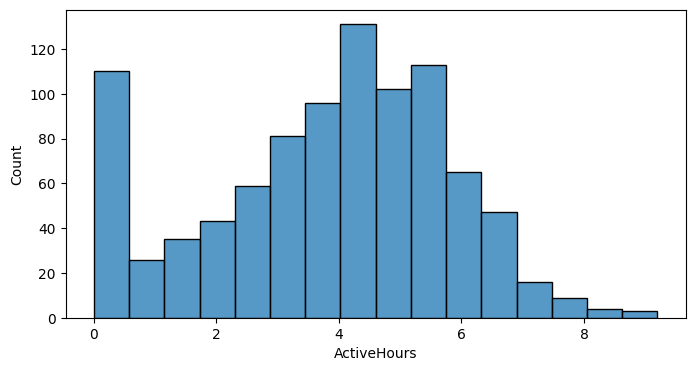

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(daily_active_minutes_df, x="ActiveHours");

In [11]:
daily_active_minutes_df['ActiveHours'].max(), round(daily_active_minutes_df['ActiveHours'].median(),2), round(daily_active_minutes_df['ActiveHours'].mean(),2)

(9.2, 4.12, 3.79)

In [12]:
x = daily_active_minutes_df[daily_active_minutes_df['ActiveHours']==0]['ActiveHours'].count()
total = daily_active_minutes_df['ActiveHours'].count()

x, total, str(round(x / total * 100, 2)) + "%"

(83, 940, '8.83%')

Aside from the fact that 8.83% of user sessions had 0 active hours per day, the rest of the data follows a normal distribution. The maximum active time in a session is 9.2 hours (maybe the user ran a marathon or athletic event), the median active time per session is 4.12 hours, and the mean active time is 3.79 hours per session.

In [13]:
minute_data_df.head()

,Id,ActivityDate,MinuteIntensityType,Minutes
0,1503960366,2016-04-12,VeryActiveMinutes,25
1,1503960366,2016-04-13,VeryActiveMinutes,21
2,1503960366,2016-04-14,VeryActiveMinutes,30
3,1503960366,2016-04-15,VeryActiveMinutes,29
4,1503960366,2016-04-16,VeryActiveMinutes,36


In [14]:
total_active_time_df = minute_data_df[minute_data_df['MinuteIntensityType'] != 'SedentaryMinutes'].groupby(['Id'])['Minutes'].sum() \
  .reset_index() \
  .rename(columns={'Minutes': 'ActiveMinutes'})

total_active_time_df['ActiveHours'] = round(total_active_time_df['ActiveMinutes'] / 60,2)
total_active_time_df.head()

,Id,ActiveMinutes,ActiveHours
0,1503960366,8612,143.53
1,1624580081,5207,86.78
2,1644430081,6282,104.70
3,1844505072,3623,60.38
4,1927972279,1261,21.02


The total_active_time_df records the total recorded active time of users for the entire duration 4/12/16 - 5/9/16.

In [15]:
total_active_time_df['ActiveHours'].min(), total_active_time_df['ActiveHours'].max(), round(total_active_time_df['ActiveHours'].median(),2), round(total_active_time_df['ActiveHours'].mean(),2)

(7.02, 169.58, 116.27, 108.03)

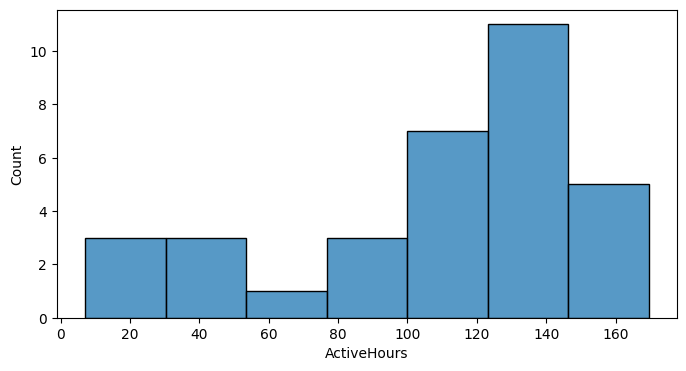

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(total_active_time_df, x="ActiveHours");

The total activity time of users is skewed left, with the average amount of active hours as 108 hours per user for the dates of 4/12/16 to 5/9/16.

We will aggregate how many of each type of minute is present

In [17]:
minute_metrics = minute_data_df.groupby(['MinuteIntensityType'])['Minutes'].sum()\
            .reset_index()
minute_metrics.head()

,MinuteIntensityType,Minutes
0,FairlyActiveMinutes,12751
1,LightlyActiveMinutes,181244
2,SedentaryMinutes,931738
3,VeryActiveMinutes,19895


**Most of the time a user is sedentary or lightly active. The fairly active and very active minutes are the least.**

---



In [18]:
distance_df = pd.melt(df1, id_vars=['Id', 'ActivityDate', 'Calories', 'TotalSteps'], value_vars=[
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance'], var_name="DistanceType", value_name="Distance")
print(distance_df.shape)
distance_df.head()

(4700, 6)


,Id,ActivityDate,Calories,TotalSteps,DistanceType,Distance
0,1503960366,2016-04-12,1985,13162,LoggedActivitiesDistance,0.0
1,1503960366,2016-04-13,1797,10735,LoggedActivitiesDistance,0.0
2,1503960366,2016-04-14,1776,10460,LoggedActivitiesDistance,0.0
3,1503960366,2016-04-15,1745,9762,LoggedActivitiesDistance,0.0
4,1503960366,2016-04-16,1863,12669,LoggedActivitiesDistance,0.0


In [19]:
distance_metrics = round(distance_df.groupby(['DistanceType'])['Distance'].sum(),2)\
            .sort_values(ascending=False)\
            .reset_index()
distance_metrics

,DistanceType,Distance
0,LightActiveDistance,3140.37
1,VeryActiveDistance,1412.52
2,ModeratelyActiveDistance,533.49
3,LoggedActivitiesDistance,101.68
4,SedentaryActiveDistance,1.51


**Most users are using their fitbit to track veryActiveDistance or LightActiveDistance**

**We can tell that LoggedActivitiesDistance + TrackerDistance = Total Distance and VeryActiveDistance + ModeratelyActiveDistance + LightActiveDistance + SedentaryActiveDistance = TrackerDistance**


In [20]:
def v_barplot(dataframe,col_1,col_2,x_label,
              color='cyan',alpha=0.8,rotation= 0):

    sns.set_style("white")
    ax= sns.barplot(data=dataframe,
                    x= col_1,y=col_2,
                    color = color,
                    alpha=alpha,
                    width = 0.5)

    for i in ax.containers:
            ax.bar_label(i,size = 10)
    sns.despine(left = True,bottom=True)
    ax.set(xlabel= x_label)
    ax.set(ylabel=None)
    ax.set(yticks=[])
    plt.xticks(rotation = rotation)
    plt.tick_params(axis='both',
                    which='major',
                    labelsize=10)
    plt.show()

In [21]:
def h_countplot(dataframe,col_1,col_2,y_label,
              color='cyan',alpha=0.8):

    sns.set_style("white")
    ax= sns.barplot(data=dataframe,
                    y= col_1,x=col_2,
                    color = color,
                    alpha=alpha,
                    orient='h')

    for i in ax.containers:
            ax.bar_label(i,size = 10)
    sns.despine(left = True,bottom=True)
    ax.set(xlabel= None)
    ax.set(ylabel=y_label)
    ax.set(xticks=[])
    ax.set(xticklabels=[])
    plt.tick_params(axis='both',
                    which='major',
                    labelsize=10)
    plt.show()

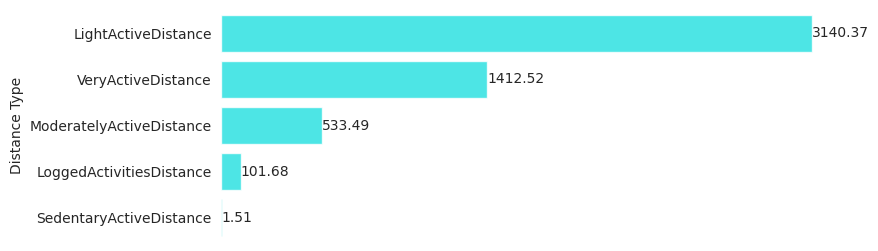

In [22]:
 plt.figure(figsize = (8,3))
 h_countplot(distance_metrics,'DistanceType','Distance','Distance Type',
              color='cyan',alpha=0.8)

Users are using a fitbase to track lightly active activities and very active activities. They do not use it when they are sedentary and they also rarely use it to log external activities when they did not wear their fitbase e.g. swimming

In [23]:
(df1['LoggedActivitiesDistance'] + df1['TrackerDistance'] - df1['TotalDistance'] < 0.1).sum()

908

In [24]:
(((df1['VeryActiveDistance'] + df1['ModeratelyActiveDistance']  + df1['LightActiveDistance'] + df1['SedentaryActiveDistance']) - df1['TrackerDistance']) < 0.1).sum()

926

While not explicity stated, we can infer that

1) TotalDistance = LoggedActivitiesDistance + TrackerDistance

2) TrackerDistance = VeryActiveDistance + ModeratelyActiveDistance + LightActiveDistance + SedentaryActiveDistance

In [25]:
df1['LoggedActivitiesDistance'].value_counts()

0.000000    908
2.092147      9
2.253081      7
4.081692      1
4.861792      1
4.878232      1
4.912368      1
2.832326      1
4.911146      1
4.885605      1
4.924841      1
2.785175      1
1.959596      1
4.930550      1
3.285415      1
4.851307      1
4.869783      1
3.167822      1
4.942142      1
Name: LoggedActivitiesDistance, dtype: int64

This shows us that users hardly use the logging activities feature on their fitbits as most remain at the default of 0.

Of the data, the ones containing daily values are:


1) dailyActivity_merged.csv

2) dailyCalories_merged.csv

3) dailyIntensities_merged.csv

4) dailySteps_merged.csv

In [26]:
df2 = pd.read_csv('/content/drive/MyDrive/fitbase data/dailyCalories_merged.csv')
df2.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [27]:
df2['Id'].nunique(), df1['Id'].nunique()

(33, 33)

In [28]:
print((df2[['Id']] == df1[['Id']]).sum()==940)

Id    True
dtype: bool


In [29]:
print((df2[['Calories']] == df1[['Calories']]).sum()==940)

Calories    True
dtype: bool


In [30]:
print((df2[['ActivityDay']].values == df1[['ActivityDate']].values).sum()==940)

False


In [31]:
df1.shape, df2.shape

((940, 15), (940, 3))

The above metrics show that DataFrame 2 is completely contained in DataFrame 1, so we don't need DataFrame 2 at all.

In [32]:
df3 = pd.read_csv('/content/drive/MyDrive/fitbase data/dailyIntensities_merged.csv')
df3.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


In [33]:
df3.shape

(940, 10)

In [34]:
df1.columns, df3.columns

(Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
        'LoggedActivitiesDistance', 'VeryActiveDistance',
        'ModeratelyActiveDistance', 'LightActiveDistance',
        'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
        'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
       dtype='object'),
 Index(['Id', 'ActivityDay', 'SedentaryMinutes', 'LightlyActiveMinutes',
        'FairlyActiveMinutes', 'VeryActiveMinutes', 'SedentaryActiveDistance',
        'LightActiveDistance', 'ModeratelyActiveDistance',
        'VeryActiveDistance'],
       dtype='object'))

In [35]:
for c in df3.columns:
    if c == 'ActivityDay':
        print((df3[c] == df1['ActivityDate']).sum()==940)
    else:
        print((df3[c] == df1[c]).sum()==940)


True
True
True
True
True
True
True
True
True
True


**Looks like all data in df3 was already contained in df1, so no need to consolidate from df3**

In [36]:
df4 = pd.read_csv('/content/drive/MyDrive/fitbase data/dailySteps_merged.csv')
df4.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [37]:
for c in df4.columns:
    if c not in df1.columns and c != 'ActivityDay':
        print(c)


StepTotal


StepTotal is in df1 as TotalSteps, so no need to add this df

In [38]:
df1.shape, df4.shape

((940, 15), (940, 3))

In [39]:
print(((df4['Id'] == df1['Id']) & (df4['ActivityDay'] == df1['ActivityDate'])).sum()==940)

True


**It looks like ID and Date for df1 and df4 are the same and stepTotal is the same as totalSteps**

In [40]:
df4.dtypes, df1.dtypes

(Id              int64
 ActivityDay    object
 StepTotal       int64
 dtype: object,
 Id                                   int64
 ActivityDate                datetime64[ns]
 TotalSteps                           int64
 TotalDistance                      float64
 TrackerDistance                    float64
 LoggedActivitiesDistance           float64
 VeryActiveDistance                 float64
 ModeratelyActiveDistance           float64
 LightActiveDistance                float64
 SedentaryActiveDistance            float64
 VeryActiveMinutes                    int64
 FairlyActiveMinutes                  int64
 LightlyActiveMinutes                 int64
 SedentaryMinutes                     int64
 Calories                             int64
 dtype: object)

To summarize, so far df2, df3, and df4 are already all contained in df1.

In [41]:
df5 = pd.read_csv('/content/drive/MyDrive/fitbase data/heartrate_seconds_merged.csv')
print("Different participants: " + str(df5['Id'].nunique()) + "\nSize of data: " + str(df5.shape) + "\n" + "Date Range: " + str(df5["Time"].min()) + " - " + str(df5["Time"].max()))
df5.head()

Different participants: 14
Size of data: (2483658, 3)
Date Range: 4/12/2016 10:00:00 AM - 5/9/2016 9:59:59 PM


,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


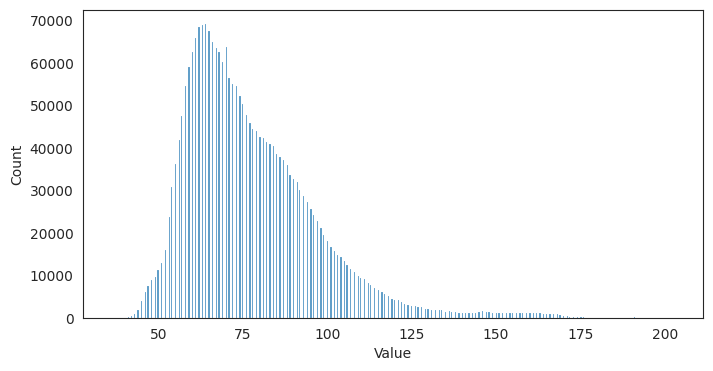

In [42]:
plt.figure(figsize=(8,4))
sns.histplot(data=df5['Value']);

Heart rate (bpm) distribution is skewed to the right.

In [43]:
a = 'The min heart rate is: {} bpm\nThe mean heart rate is: {} bpm\nThe median heart rate is: {} bpm\nThe max heart rate is: {} bpm'.format(round(df5['Value'].min(),2), round(df5['Value'].mean(),2), round(df5['Value'].median(),2), round(df5['Value'].max(),2))
print(a)

The min heart rate is: 36 bpm
The mean heart rate is: 77.33 bpm
The median heart rate is: 73.0 bpm
The max heart rate is: 203 bpm


In [44]:
avg_hr = round(df5.groupby(['Id'])['Value'].mean(),2)\
  .reset_index()\
  .rename(columns={'Value':'Heartrate Bpm'})

avg_hr

,Id,Heartrate Bpm
0,2022484408,80.24
1,2026352035,93.78
2,2347167796,76.72
3,4020332650,82.30
4,4388161847,66.13
5,4558609924,81.67
6,5553957443,68.63
7,5577150313,69.56
8,6117666160,83.75
9,6775888955,92.03


In [45]:
df5["ActivityDate"] = df5["Time"].apply(lambda x: x.split(" ")[0])

In [189]:
df5['Id'].value_counts()

4020332650    285461
6962181067    266326
5553957443    255174
4388161847    249748
5577150313    248560
8877689391    228841
4558609924    192168
6117666160    158899
2022484408    154104
2347167796    152683
7007744171    133592
8792009665    122841
6775888955     32771
2026352035      2490
Name: Id, dtype: int64

In [46]:
print("Start to end range: " + str(df5['ActivityDate'].min()) + " - " + str(df5['ActivityDate'].max()))
print("There are 14 unique participants: " + str(df5['Id'].nunique()))
df5.head()

Start to end range: 4/12/2016 - 5/9/2016
There are 14 unique participants: 14


,Id,Time,Value,ActivityDate
0,2022484408,4/12/2016 7:21:00 AM,97,4/12/2016
1,2022484408,4/12/2016 7:21:05 AM,102,4/12/2016
2,2022484408,4/12/2016 7:21:10 AM,105,4/12/2016
3,2022484408,4/12/2016 7:21:20 AM,103,4/12/2016
4,2022484408,4/12/2016 7:21:25 AM,101,4/12/2016


The average heartrate in bpm is taken in 5 second increments. We cannot do much analysis with this data so we will aggregate the data and put it into df1 with an average daily heartrate.

Observation: Out of 33 participants that we have active data for, only 14 do we have heartrate data. Possible users do not like to track heart rate as it is more involved or incomfortable.

**Calculate Average Daily HeartRate**

In [47]:
avg_daily_hr_df = round(df5.groupby(["Id", "ActivityDate"])['Value'].mean(),2)\
.reset_index()\
.rename(columns={"Value": "Average Daily HeartRate (bpm)"})

avg_daily_hr_df.head()

,Id,ActivityDate,Average Daily HeartRate (bpm)
0,2022484408,4/12/2016,75.80
1,2022484408,4/13/2016,80.34
2,2022484408,4/14/2016,72.63
3,2022484408,4/15/2016,80.44
4,2022484408,4/16/2016,75.96


Here we calculate the average daily heartrate of the participants

In [48]:
avg_daily_hr_df['ActivityDate'] = pd.DatetimeIndex(avg_daily_hr_df['ActivityDate'])

In [49]:
distance_df.head()

,Id,ActivityDate,Calories,TotalSteps,DistanceType,Distance
0,1503960366,2016-04-12,1985,13162,LoggedActivitiesDistance,0.0
1,1503960366,2016-04-13,1797,10735,LoggedActivitiesDistance,0.0
2,1503960366,2016-04-14,1776,10460,LoggedActivitiesDistance,0.0
3,1503960366,2016-04-15,1745,9762,LoggedActivitiesDistance,0.0
4,1503960366,2016-04-16,1863,12669,LoggedActivitiesDistance,0.0


### Merge avg_daily_hr into df1

In [50]:
df1_heartrate_merge = df1.merge(avg_daily_hr_df, on=['Id', 'ActivityDate'], how="inner")
df1_heartrate_merge.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Average Daily HeartRate (bpm)
0,2022484408,2016-04-12,11875,8.34,8.34,0.0,3.31,0.77,4.26,0.0,42,14,227,1157,2390,75.80
1,2022484408,2016-04-13,12024,8.50,8.50,0.0,2.99,0.10,5.41,0.0,43,5,292,1100,2601,80.34
2,2022484408,2016-04-14,10690,7.50,7.50,0.0,2.48,0.21,4.82,0.0,32,3,257,1148,2312,72.63
3,2022484408,2016-04-15,11034,8.03,8.03,0.0,1.94,0.31,5.78,0.0,27,9,282,1122,2525,80.44
4,2022484408,2016-04-16,10100,7.09,7.09,0.0,3.15,0.55,3.39,0.0,41,11,151,1237,2177,75.96


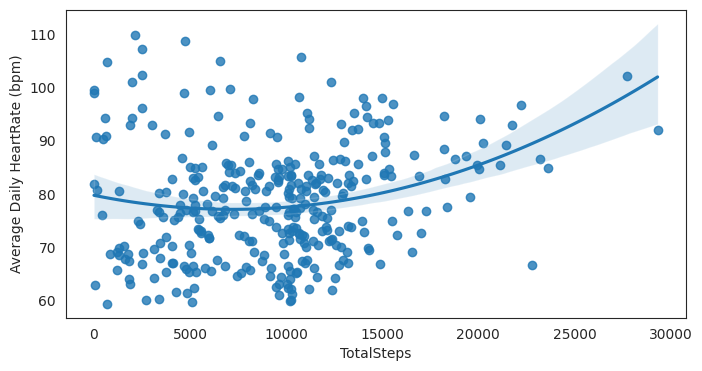

In [51]:
# df1_heartrate_merge[['TotalSteps', 'Average Daily HeartRate (bpm)']]
plt.figure(figsize=(8,4))
sns.regplot(df1_heartrate_merge, x='TotalSteps', y ='Average Daily HeartRate (bpm)', order=2);
#order parameter shows a quadratic relationship

In [52]:
df_features = df1_heartrate_merge[['TotalSteps', 'Average Daily HeartRate (bpm)', 'Calories', 'TotalDistance', 'VeryActiveDistance', 'VeryActiveMinutes', 'SedentaryMinutes']]
feature_cor = df_features.corr()
feature_cor

,TotalSteps,Average Daily HeartRate (bpm),Calories,TotalDistance,VeryActiveDistance,VeryActiveMinutes,SedentaryMinutes
TotalSteps,1.000000,0.168815,0.630640,0.977694,0.755228,0.585215,-0.053596
Average Daily HeartRate (bpm),0.168815,1.000000,0.110795,0.168792,0.189018,0.094948,0.438417
Calories,0.630640,0.110795,1.000000,0.670273,0.587640,0.719824,0.060623
TotalDistance,0.977694,0.168792,0.670273,1.000000,0.839450,0.586312,-0.018429
VeryActiveDistance,0.755228,0.189018,0.587640,0.839450,1.000000,0.708920,0.081418
VeryActiveMinutes,0.585215,0.094948,0.719824,0.586312,0.708920,1.000000,-0.057692
SedentaryMinutes,-0.053596,0.438417,0.060623,-0.018429,0.081418,-0.057692,1.000000


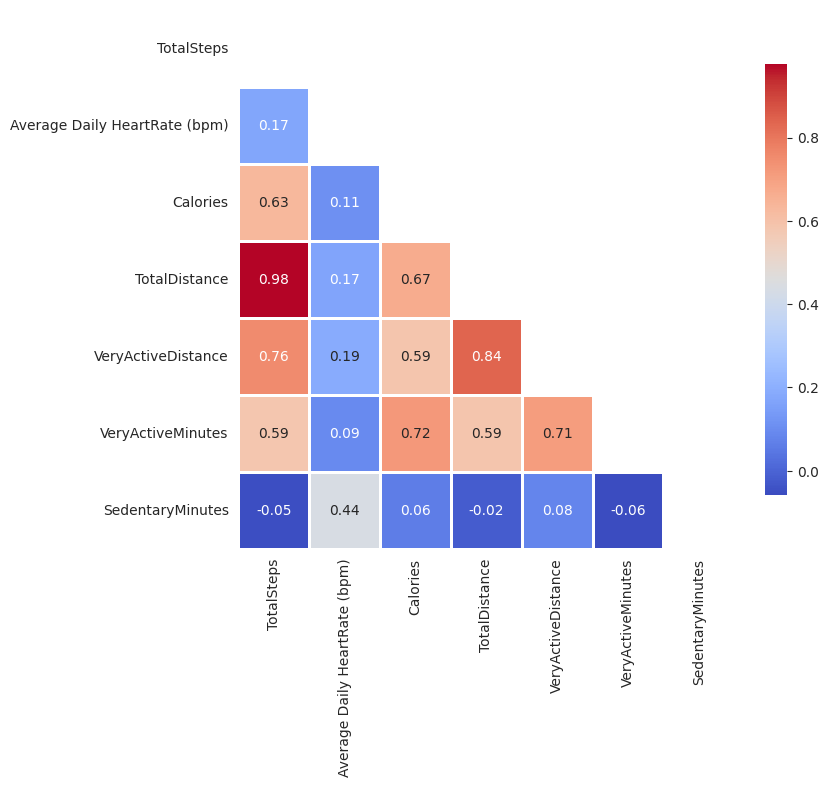

In [53]:
# creating a mask to keep only the half of the correlation table

mask = np.triu(np.ones_like(feature_cor,dtype=bool))

plt.figure(figsize=(8,7))
sns.heatmap(feature_cor,annot = feature_cor,mask=mask,
cmap = 'coolwarm',
linewidths=1,fmt=".2f",
cbar_kws={"shrink": .8})
plt.show()

In [55]:
df_distance_heartrate_merge = distance_df.merge(avg_daily_hr_df, on=['Id', 'ActivityDate'], how="inner")
df_distance_heartrate_merge.head()

,Id,ActivityDate,Calories,TotalSteps,DistanceType,Distance,Average Daily HeartRate (bpm)
0,2022484408,2016-04-12,2390,11875,LoggedActivitiesDistance,0.00,75.8
1,2022484408,2016-04-12,2390,11875,VeryActiveDistance,3.31,75.8
2,2022484408,2016-04-12,2390,11875,ModeratelyActiveDistance,0.77,75.8
3,2022484408,2016-04-12,2390,11875,LightActiveDistance,4.26,75.8
4,2022484408,2016-04-12,2390,11875,SedentaryActiveDistance,0.00,75.8


In [56]:
df_distance_heartrate_merge.columns, df_distance_heartrate_merge.shape

(Index(['Id', 'ActivityDate', 'Calories', 'TotalSteps', 'DistanceType',
        'Distance', 'Average Daily HeartRate (bpm)'],
       dtype='object'),
 (1670, 7))

In [57]:
a = df_distance_heartrate_merge[df_distance_heartrate_merge['DistanceType'] != 'LoggedActivitiesDistance']
a = a[['ActivityDate', 'Calories', 'TotalSteps', 'DistanceType',
       'Distance', 'Average Daily HeartRate (bpm)']]
a.head()

,ActivityDate,Calories,TotalSteps,DistanceType,Distance,Average Daily HeartRate (bpm)
1,2016-04-12,2390,11875,VeryActiveDistance,3.31,75.80
2,2016-04-12,2390,11875,ModeratelyActiveDistance,0.77,75.80
3,2016-04-12,2390,11875,LightActiveDistance,4.26,75.80
4,2016-04-12,2390,11875,SedentaryActiveDistance,0.00,75.80
6,2016-04-13,2601,12024,VeryActiveDistance,2.99,80.34


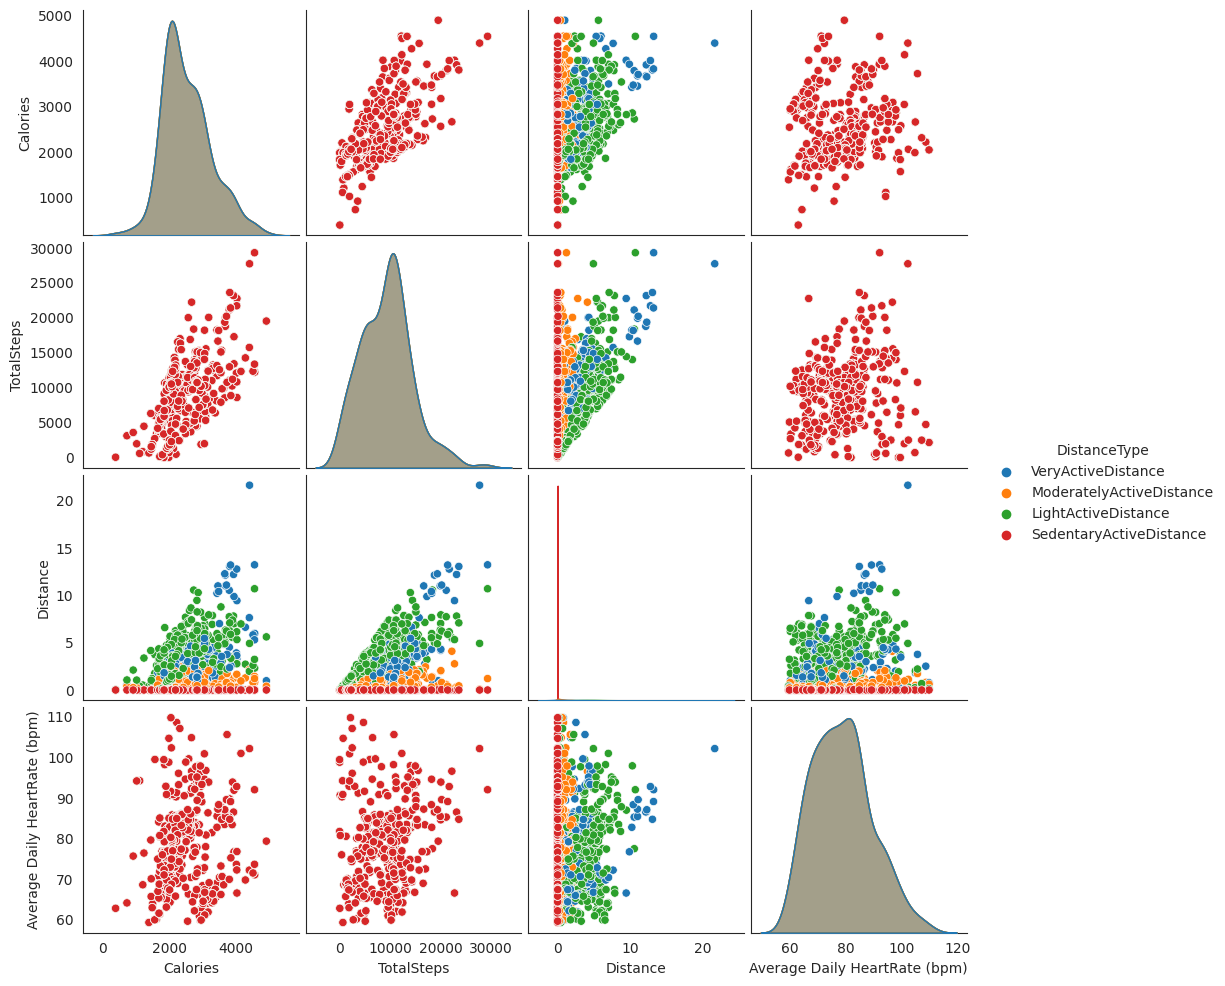

In [58]:
sns.pairplot(a, hue="DistanceType")
plt.show();

Very strong correlation between totalsteps and calories. Positive correlation between totalsteps and lightly active distance and moderately active distance. The variables are fairly normally distributed, except for the distance distribution (alot of 0's perhaps when people did not log their data)

In [59]:
a = a[['Calories', 'TotalSteps',
       'Distance', 'Average Daily HeartRate (bpm)']]
      #  np.std,np.var
a.agg([max,np.median,np.mean,min])


,Calories,TotalSteps,Distance,Average Daily HeartRate (bpm)
max,4900.000000,29326.000000,21.660000,109.790000
median,2386.500000,9751.000000,0.480000,77.495000
mean,2529.547904,9310.508982,1.676347,78.613862
min,403.000000,0.000000,0.000000,59.380000


### Merge hourly data into one big dataframe

In [60]:
df6 = pd.read_csv('/content/drive/MyDrive/fitbase data/hourlyCalories_merged.csv')
df6.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [61]:
df6.shape

(22099, 3)

In [62]:
(set(df6.Id.values) == set(df1.Id.values))

True

**It's the same set of Id values, but df6 cannot be added directly into df1. This is because df6 is in hours but df1 in days**

In [63]:
df6['ActivityDate'] = pd.to_datetime(df6.ActivityHour).dt.date

In [64]:
df6 = df6.reindex(columns={'Id', 'ActivityHour', 'ActivityDate', 'Calories'})
df6.head()

,Calories,ActivityHour,ActivityDate,Id
0,81,4/12/2016 12:00:00 AM,2016-04-12,1503960366
1,61,4/12/2016 1:00:00 AM,2016-04-12,1503960366
2,59,4/12/2016 2:00:00 AM,2016-04-12,1503960366
3,47,4/12/2016 3:00:00 AM,2016-04-12,1503960366
4,48,4/12/2016 4:00:00 AM,2016-04-12,1503960366


In [65]:
calories_agg_df6 = df6.groupby([df6.Id, df6.ActivityDate])['Calories'].sum()\
    .reset_index()
calories_agg_df6

,Id,ActivityDate,Calories
0,1503960366,2016-04-12,1988
1,1503960366,2016-04-13,1798
2,1503960366,2016-04-14,1776
3,1503960366,2016-04-15,1745
4,1503960366,2016-04-16,1866
...,...,...,...
929,8877689391,2016-05-08,2840
930,8877689391,2016-05-09,3695
931,8877689391,2016-05-10,2826
932,8877689391,2016-05-11,3827


The aggregated daily calories for df6 closely matches daily calories in df1. This is a good sanity check. While we do not need to merge aggregated daily calories from df6 into df1, we still need df6 for its hourly data.

### Hourly Intensity

In [66]:
df7 = pd.read_csv('/content/drive/MyDrive/fitbase data/hourlyIntensities_merged.csv')
df7.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


It looks like total intensity is a measure of intensity output for that hour. Average intensity is total intensity divided by 60, which gives an average intensity output per minute.

In [67]:
df7.shape, df6.shape

((22099, 4), (22099, 4))

In [68]:
((df7.Id == df6.Id).sum() == 22099 & (df7.ActivityHour == df6.ActivityHour).sum() == 22099)

True

This means df6 and df7 combine easily

In [69]:
hourly_df = df6
hourly_df['TotalIntensity'] = df7['TotalIntensity']
hourly_df['AverageIntensity'] = df7['AverageIntensity']

hourly_df.head()

,Calories,ActivityHour,ActivityDate,Id,TotalIntensity,AverageIntensity
0,81,4/12/2016 12:00:00 AM,2016-04-12,1503960366,20,0.333333
1,61,4/12/2016 1:00:00 AM,2016-04-12,1503960366,8,0.133333
2,59,4/12/2016 2:00:00 AM,2016-04-12,1503960366,7,0.116667
3,47,4/12/2016 3:00:00 AM,2016-04-12,1503960366,0,0.000000
4,48,4/12/2016 4:00:00 AM,2016-04-12,1503960366,0,0.000000


In [70]:
df7['ActivityDate'] = pd.DatetimeIndex(df7.ActivityHour.str.split(" ").apply(lambda x: x[0]))

In [71]:
df7 = df7.reindex(columns=['Id', 'ActivityHour', 'ActivityDate', 'TotalIntensity', 'AverageIntensity'])

In [72]:
df7.head()

,Id,ActivityHour,ActivityDate,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,2016-04-12,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,2016-04-12,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,2016-04-12,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,2016-04-12,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,2016-04-12,0,0.000000


In [73]:
intensity_df = df7.groupby([df7.Id, df7.ActivityDate])['TotalIntensity'].sum()\
    .reset_index()

intensity_df

,Id,ActivityDate,TotalIntensity
0,1503960366,2016-04-12,429
1,1503960366,2016-04-13,318
2,1503960366,2016-04-14,293
3,1503960366,2016-04-15,364
4,1503960366,2016-04-16,349
...,...,...,...
929,8877689391,2016-05-08,304
930,8877689391,2016-05-09,474
931,8877689391,2016-05-10,300
932,8877689391,2016-05-11,501


In [74]:
def compareIds(dfA, dfB):
    dfA_Id_set = set(dfA.Id.values)
    dfB_Id_set = set(dfB.Id.values)

    if dfA_Id_set == dfB_Id_set:
      print("All Ids are the same")
    else:
      print("Ids differ")

Next step: add intensity into df1. Correlate intensity with calories and distance

In [75]:
compareIds(df1, intensity_df)

All Ids are the same


In [76]:
df1_intensity_merge = df1.merge(intensity_df, on=['Id', 'ActivityDate'], how="inner")

In [77]:
print(df1_intensity_merge.shape)
df1_intensity_merge.head()

(934, 16)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalIntensity
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,429
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,318
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,293
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,364
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,349


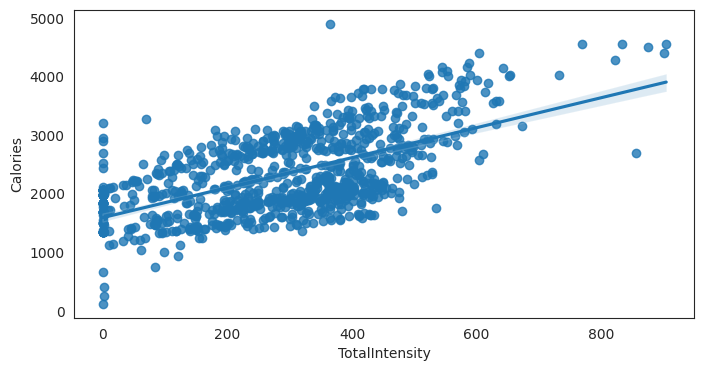

In [78]:
plt.figure(figsize=(8,4))
sns.regplot(df1_intensity_merge, x='TotalIntensity', y ='Calories', order=1);

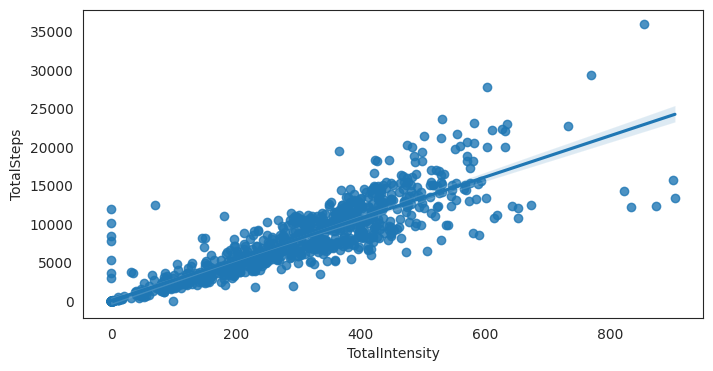

In [79]:
plt.figure(figsize=(8,4))
sns.regplot(df1_intensity_merge, x='TotalIntensity', y ='TotalSteps', order=1);

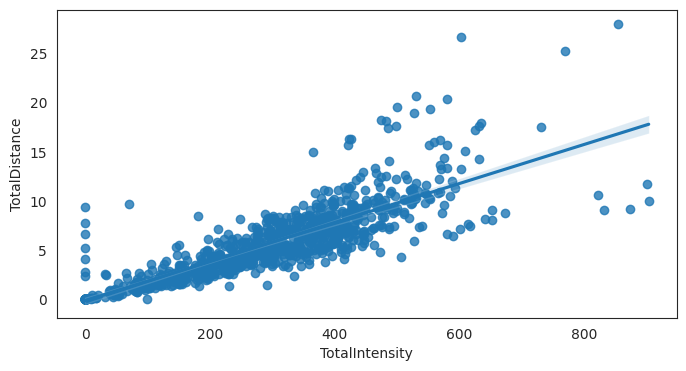

In [80]:
plt.figure(figsize=(8,4))
sns.regplot(df1_intensity_merge, x='TotalIntensity', y ='TotalDistance', order=1);

In [81]:
df_features = df1_intensity_merge[['TotalSteps', 'TotalIntensity', 'Calories', 'TotalDistance', 'VeryActiveDistance', 'VeryActiveMinutes', 'SedentaryMinutes']]
feature_cor = df_features.corr()
feature_cor

,TotalSteps,TotalIntensity,Calories,TotalDistance,VeryActiveDistance,VeryActiveMinutes,SedentaryMinutes
TotalSteps,1.000000,0.880616,0.584681,0.985207,0.740872,0.666668,-0.335234
TotalIntensity,0.880616,1.000000,0.612875,0.845539,0.576131,0.696628,-0.446497
Calories,0.584681,0.612875,1.000000,0.641821,0.497805,0.624501,-0.113372
TotalDistance,0.985207,0.845539,0.641821,1.000000,0.795393,0.680779,-0.294681
VeryActiveDistance,0.740872,0.576131,0.497805,0.795393,1.000000,0.826319,-0.062567
VeryActiveMinutes,0.666668,0.696628,0.624501,0.680779,0.826319,1.000000,-0.167372
SedentaryMinutes,-0.335234,-0.446497,-0.113372,-0.294681,-0.062567,-0.167372,1.000000


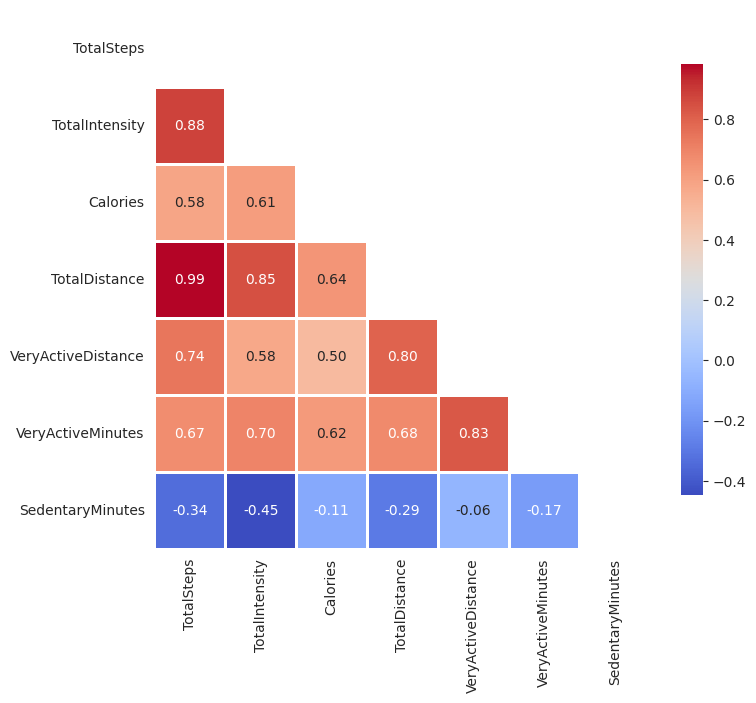

In [82]:
# creating a mask to keep only the half of the correlation table

mask = np.triu(np.ones_like(feature_cor,dtype=bool))

plt.figure(figsize=(8,7))
sns.heatmap(feature_cor,annot = feature_cor,mask=mask,
cmap = 'coolwarm',
linewidths=1,fmt=".2f",
cbar_kws={"shrink": .8})
plt.show()

TotalSteps and TotalDistance are highly correlated

TotalSteps and TotalIntensity are highly correlated

TotalIntensity and TotalDistance are highly correlated

TotalDistance and VeryActiveDistance are highly correlated

VeryActiveMinutes and VeryActiveDistance are highly correlated

In [83]:
df8 = pd.read_csv('/content/drive/MyDrive/fitbase data/hourlySteps_merged.csv')
df8.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [84]:
hourly_df.shape, df8.shape

((22099, 6), (22099, 3))

In [85]:
((hourly_df.Id == df8.Id).sum() == 22099 & (hourly_df.ActivityHour == df8.ActivityHour).sum() == 22099)

True

df8 can be merged into hourly_df easily

We have steps in hourly form. We do not need to combine it into daily form df1 as we have a steptotal field in there. We need to combine it into hourly form

In [86]:
hourly_df['StepTotal'] = df8['StepTotal']

In [87]:
hourly_df.head()

,Calories,ActivityHour,ActivityDate,Id,TotalIntensity,AverageIntensity,StepTotal
0,81,4/12/2016 12:00:00 AM,2016-04-12,1503960366,20,0.333333,373
1,61,4/12/2016 1:00:00 AM,2016-04-12,1503960366,8,0.133333,160
2,59,4/12/2016 2:00:00 AM,2016-04-12,1503960366,7,0.116667,151
3,47,4/12/2016 3:00:00 AM,2016-04-12,1503960366,0,0.000000,0
4,48,4/12/2016 4:00:00 AM,2016-04-12,1503960366,0,0.000000,0


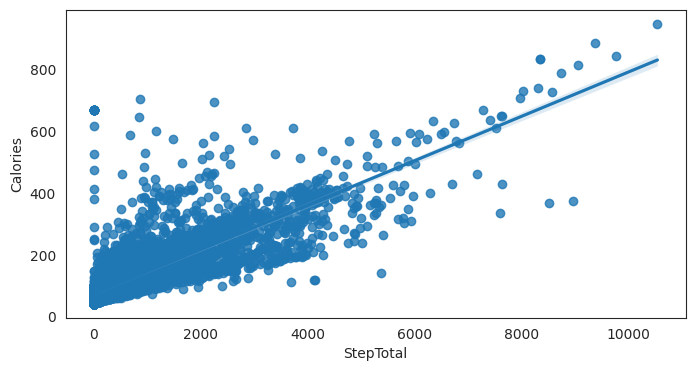

In [88]:
plt.figure(figsize=(8,4))
sns.regplot(hourly_df, x='StepTotal', y ='Calories', order=1);

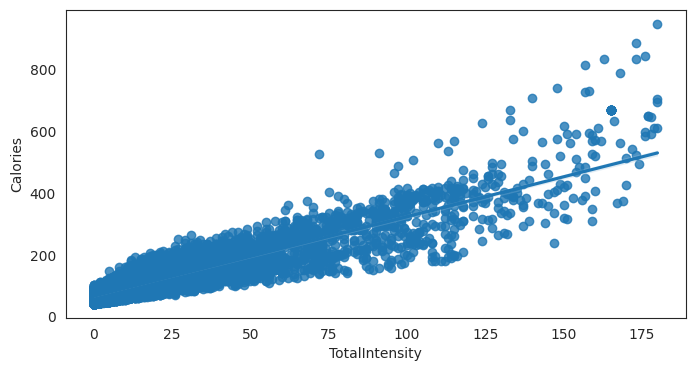

In [89]:
plt.figure(figsize=(8,4))
sns.regplot(hourly_df, x='TotalIntensity', y ='Calories', order=1);

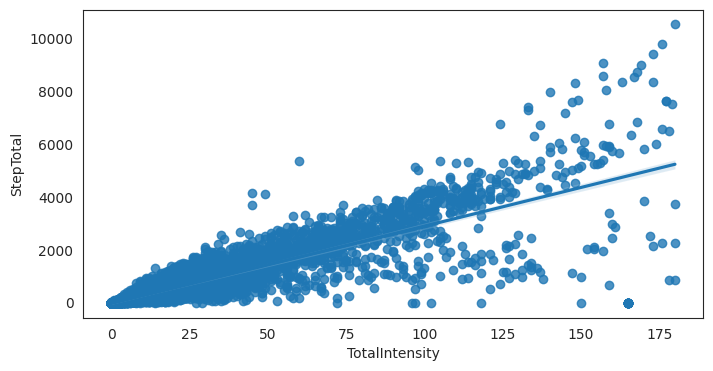

In [90]:
plt.figure(figsize=(8,4))
sns.regplot(hourly_df, x='TotalIntensity', y ='StepTotal', order=1);

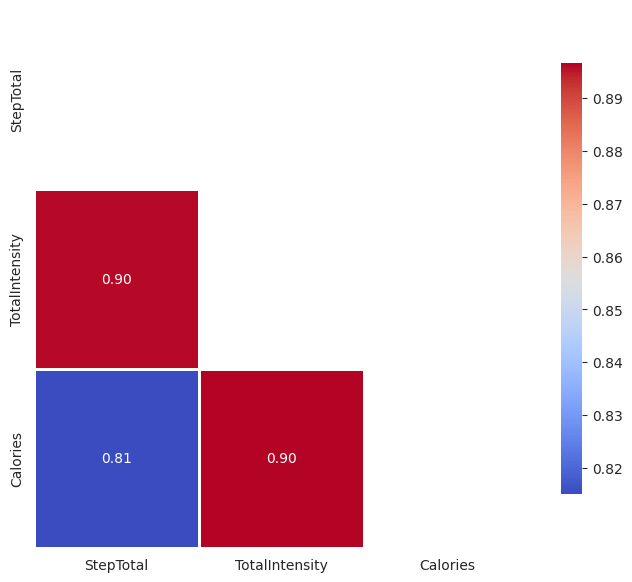

In [91]:
df_features = hourly_df[['StepTotal', 'TotalIntensity', 'Calories']]
feature_cor = df_features.corr()

# creating a mask to keep only the half of the correlation table

mask = np.triu(np.ones_like(feature_cor,dtype=bool))

plt.figure(figsize=(8,7))
sns.heatmap(feature_cor,annot = feature_cor,mask=mask,
cmap = 'coolwarm',
linewidths=1,fmt=".2f",
cbar_kws={"shrink": .8})
plt.show()

As it turns out, all variables are quite correlated with one another. TotalIntensity and Calories, StepTotal and TotalIntensity, and StepTotal and Calories are all strongly correlated.

In [92]:
df9 = pd.read_csv('/content/drive/MyDrive/fitbase data/minuteCaloriesNarrow_merged.csv')
df9

,Id,ActivityMinute,Calories
0,1503960366,4/12/2016 12:00:00 AM,0.78650
1,1503960366,4/12/2016 12:01:00 AM,0.78650
2,1503960366,4/12/2016 12:02:00 AM,0.78650
3,1503960366,4/12/2016 12:03:00 AM,0.78650
4,1503960366,4/12/2016 12:04:00 AM,0.78650
...,...,...,...
1325575,8877689391,5/12/2016 1:55:00 PM,1.33353
1325576,8877689391,5/12/2016 1:56:00 PM,1.33353
1325577,8877689391,5/12/2016 1:57:00 PM,1.33353
1325578,8877689391,5/12/2016 1:58:00 PM,1.33353


In [93]:
compareIds(df9, df1)

All Ids are the same


In [94]:
df10 = pd.read_csv('/content/drive/MyDrive/fitbase data/minuteCaloriesWide_merged.csv')
df10.head()

,Id,ActivityHour,Calories00,Calories01,Calories02,Calories03,Calories04,Calories05,Calories06,Calories07,...,Calories50,Calories51,Calories52,Calories53,Calories54,Calories55,Calories56,Calories57,Calories58,Calories59
0,1503960366,4/13/2016 12:00:00 AM,1.8876,2.2022,0.9438,0.9438,0.9438,2.0449,0.9438,2.2022,...,0.9438,2.0449,2.0449,0.9438,2.3595,1.8876,0.9438,0.9438,0.9438,0.9438
1,1503960366,4/13/2016 1:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.9438,0.9438,0.9438,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
2,1503960366,4/13/2016 2:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
3,1503960366,4/13/2016 3:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
4,1503960366,4/13/2016 4:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865


We do not need to merge df10, as the information is contained in df9 in an easier to work with form

In [95]:
df11 = pd.read_csv('/content/drive/MyDrive/fitbase data/minuteIntensitiesNarrow_merged.csv')
df11.head()

,Id,ActivityMinute,Intensity
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0


In [96]:
df9.shape, df11.shape

((1325580, 3), (1325580, 3))

In [97]:
((df9.Id == df11.Id).sum() == 1325580 & (df9.ActivityMinute == df11.ActivityMinute).sum() == 1325580)

True

Looks like df9 and df11 can be merged easily into a minute_df

In [98]:
minute_df = df9
minute_df['Intensity'] = df11['Intensity']
minute_df.head()

,Id,ActivityMinute,Calories,Intensity
0,1503960366,4/12/2016 12:00:00 AM,0.7865,0
1,1503960366,4/12/2016 12:01:00 AM,0.7865,0
2,1503960366,4/12/2016 12:02:00 AM,0.7865,0
3,1503960366,4/12/2016 12:03:00 AM,0.7865,0
4,1503960366,4/12/2016 12:04:00 AM,0.7865,0


In [99]:
df12 = pd.read_csv('/content/drive/MyDrive/fitbase data/minuteIntensitiesWide_merged.csv')
df12.head()

,Id,ActivityHour,Intensity00,Intensity01,Intensity02,Intensity03,Intensity04,Intensity05,Intensity06,Intensity07,...,Intensity50,Intensity51,Intensity52,Intensity53,Intensity54,Intensity55,Intensity56,Intensity57,Intensity58,Intensity59
0,1503960366,4/13/2016 12:00:00 AM,1,1,0,0,0,1,0,1,...,0,1,1,0,1,1,0,0,0,0
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
df13 = pd.read_csv('/content/drive/MyDrive/fitbase data/minuteMETsNarrow_merged.csv')
df13

,Id,ActivityMinute,METs
0,1503960366,4/12/2016 12:00:00 AM,10
1,1503960366,4/12/2016 12:01:00 AM,10
2,1503960366,4/12/2016 12:02:00 AM,10
3,1503960366,4/12/2016 12:03:00 AM,10
4,1503960366,4/12/2016 12:04:00 AM,10
...,...,...,...
1325575,8877689391,5/12/2016 1:55:00 PM,11
1325576,8877689391,5/12/2016 1:56:00 PM,11
1325577,8877689391,5/12/2016 1:57:00 PM,11
1325578,8877689391,5/12/2016 1:58:00 PM,11


In [101]:
df13.shape

(1325580, 3)

In [102]:
((minute_df.Id == df13.Id).sum() == 1325580 & (minute_df.ActivityMinute == df13.ActivityMinute).sum() == 1325580)

True

In [103]:
minute_df['METs'] = df13['METs']
minute_df.head()

,Id,ActivityMinute,Calories,Intensity,METs
0,1503960366,4/12/2016 12:00:00 AM,0.7865,0,10
1,1503960366,4/12/2016 12:01:00 AM,0.7865,0,10
2,1503960366,4/12/2016 12:02:00 AM,0.7865,0,10
3,1503960366,4/12/2016 12:03:00 AM,0.7865,0,10
4,1503960366,4/12/2016 12:04:00 AM,0.7865,0,10


In [104]:
df14 = pd.read_csv('/content/drive/MyDrive/fitbase data/minuteSleep_merged.csv')
df14.head()

,Id,date,value,logId
0,1503960366,4/12/2016 2:47:30 AM,3,11380564589
1,1503960366,4/12/2016 2:48:30 AM,2,11380564589
2,1503960366,4/12/2016 2:49:30 AM,1,11380564589
3,1503960366,4/12/2016 2:50:30 AM,1,11380564589
4,1503960366,4/12/2016 2:51:30 AM,1,11380564589


In [105]:
df15 = pd.read_csv('/content/drive/MyDrive/fitbase data/minuteStepsNarrow_merged.csv')
df15.head()

,Id,ActivityMinute,Steps
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0


In [106]:
df15.shape

(1325580, 3)

In [107]:
((minute_df.Id == df15.Id).sum() == 1325580 & (minute_df.ActivityMinute == df15.ActivityMinute).sum() == 1325580)

True

In [108]:
minute_df['Steps'] = df15['Steps']
minute_df.head()

,Id,ActivityMinute,Calories,Intensity,METs,Steps
0,1503960366,4/12/2016 12:00:00 AM,0.7865,0,10,0
1,1503960366,4/12/2016 12:01:00 AM,0.7865,0,10,0
2,1503960366,4/12/2016 12:02:00 AM,0.7865,0,10,0
3,1503960366,4/12/2016 12:03:00 AM,0.7865,0,10,0
4,1503960366,4/12/2016 12:04:00 AM,0.7865,0,10,0


In [109]:
minute_df['ActivityDate'] = minute_df['ActivityMinute'].str.split(" ").apply(lambda x: x[0])

In [110]:
minute_df['Month'] = minute_df['ActivityDate'].str.split("/").apply(lambda x: 'April' if int(x[0]) == 4 else 'May')
minute_df['Day'] = minute_df['ActivityDate'].str.split("/").apply(lambda x: x[1])

In [111]:
minute_df.head()

,Id,ActivityMinute,Calories,Intensity,METs,Steps,ActivityDate,Month,Day
0,1503960366,4/12/2016 12:00:00 AM,0.7865,0,10,0,4/12/2016,April,12
1,1503960366,4/12/2016 12:01:00 AM,0.7865,0,10,0,4/12/2016,April,12
2,1503960366,4/12/2016 12:02:00 AM,0.7865,0,10,0,4/12/2016,April,12
3,1503960366,4/12/2016 12:03:00 AM,0.7865,0,10,0,4/12/2016,April,12
4,1503960366,4/12/2016 12:04:00 AM,0.7865,0,10,0,4/12/2016,April,12


In [112]:
avg_calories_df = minute_df.groupby(['Id','ActivityDate', 'Month', 'Day'])['Calories'].sum()\
  .reset_index()

In [113]:
avg_METs_df = minute_df.groupby(['Id','ActivityDate', 'Month', 'Day'])['METs'].mean()\
  .reset_index()

In [114]:
print(avg_METs_df['Id'].value_counts().head())

print(avg_calories_df['Id'].value_counts().head())

4445114986    31
4020332650    31
8378563200    31
8053475328    31
7086361926    31
Name: Id, dtype: int64
4445114986    31
4020332650    31
8378563200    31
8053475328    31
7086361926    31
Name: Id, dtype: int64


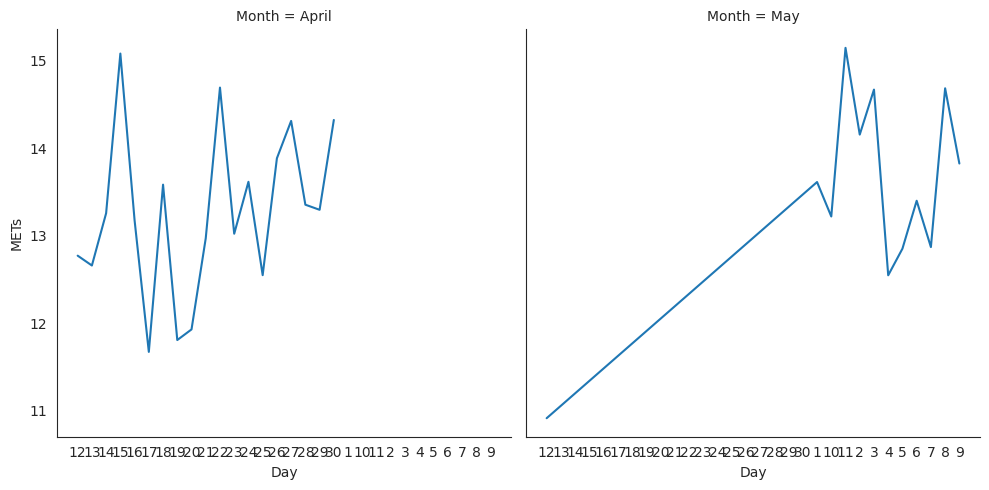

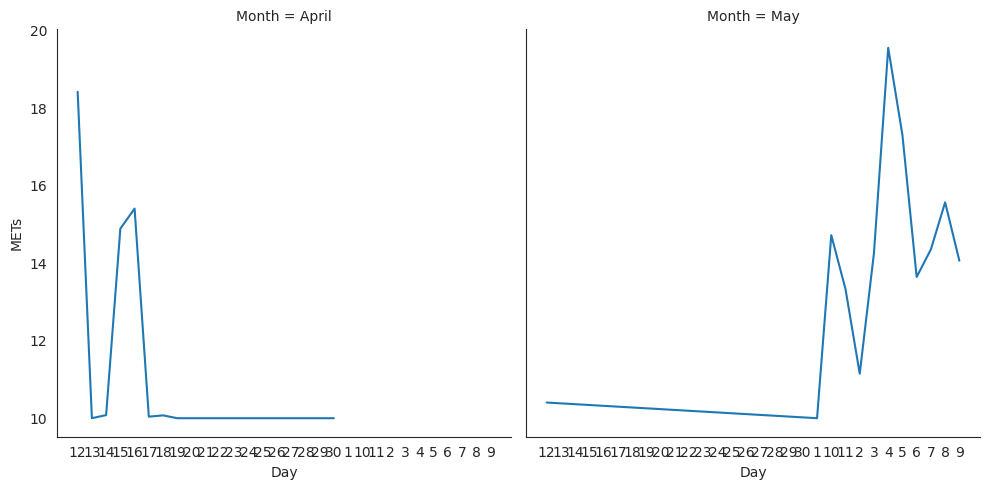

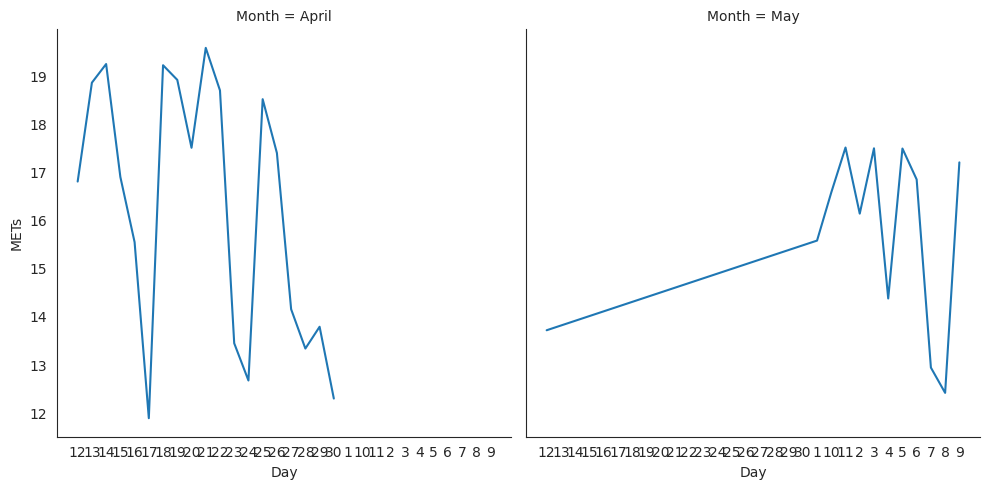

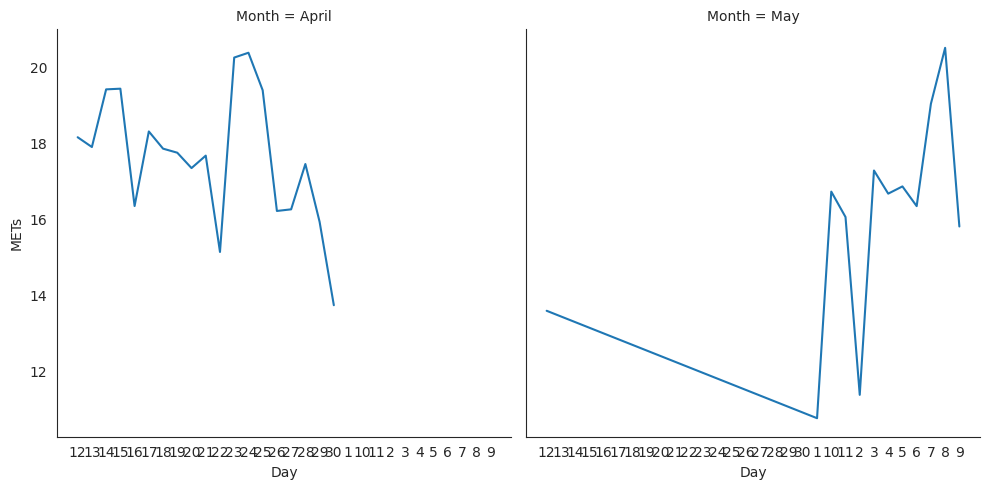

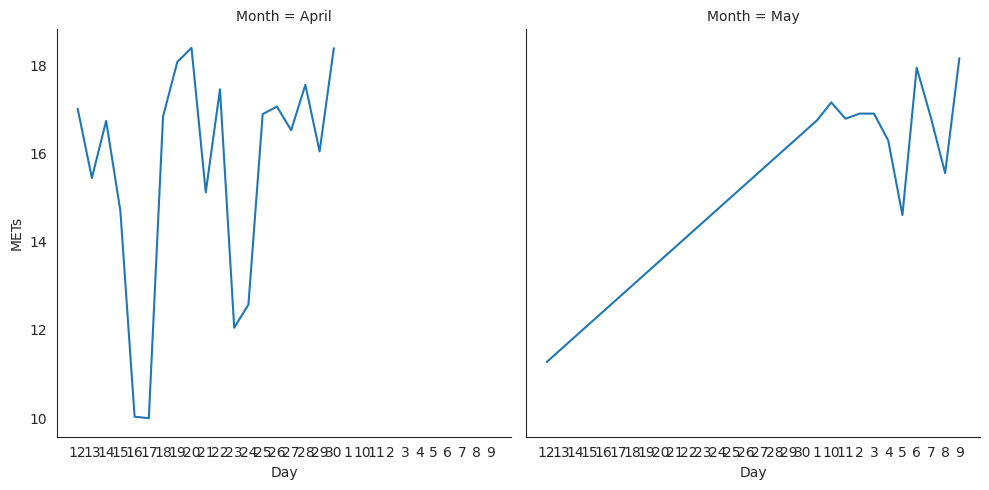

In [115]:
sns.relplot(avg_METs_df[avg_METs_df['Id']==4445114986], x="Day", y="METs", col="Month",kind='line');
sns.relplot(avg_METs_df[avg_METs_df['Id']==4020332650], x="Day", y="METs", col="Month",kind='line');
sns.relplot(avg_METs_df[avg_METs_df['Id']==8378563200], x="Day", y="METs", col="Month",kind='line');
sns.relplot(avg_METs_df[avg_METs_df['Id']==8053475328], x="Day", y="METs", col="Month",kind='line');
sns.relplot(avg_METs_df[avg_METs_df['Id']==7086361926], x="Day", y="METs", col="Month",kind='line');

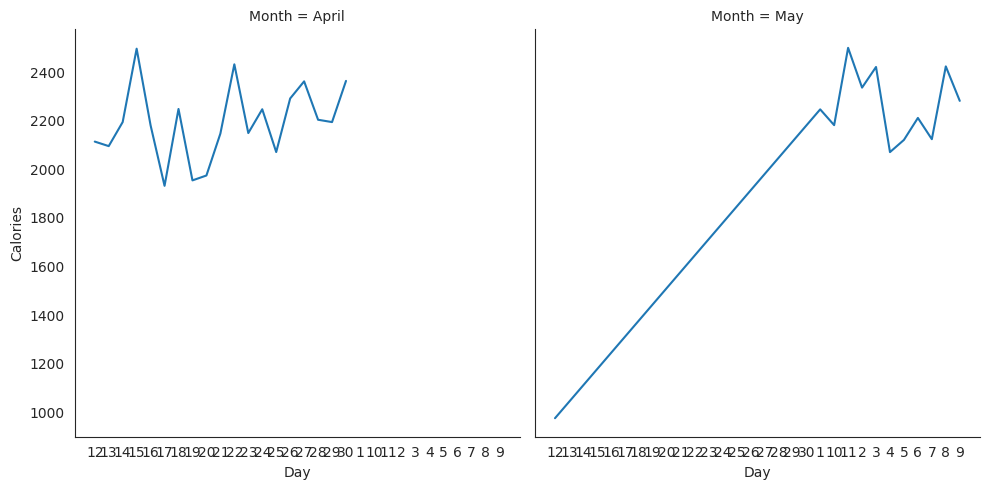

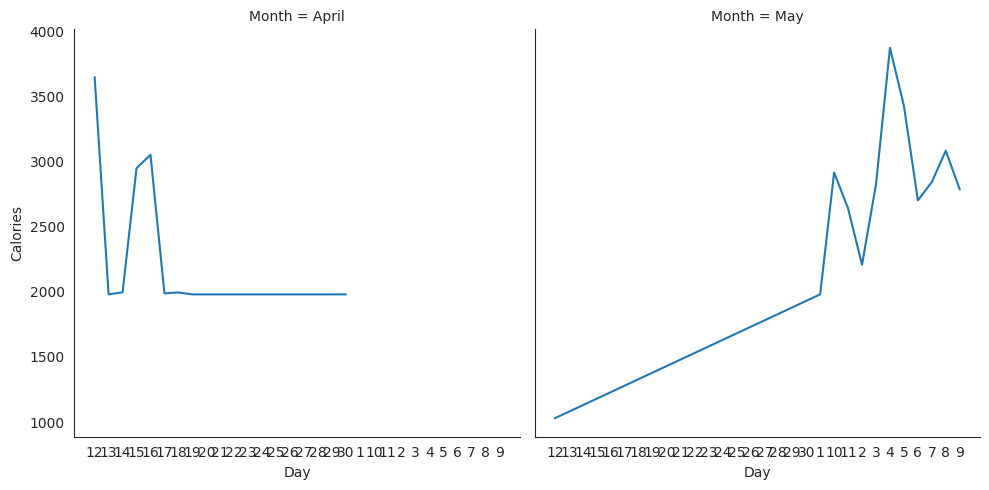

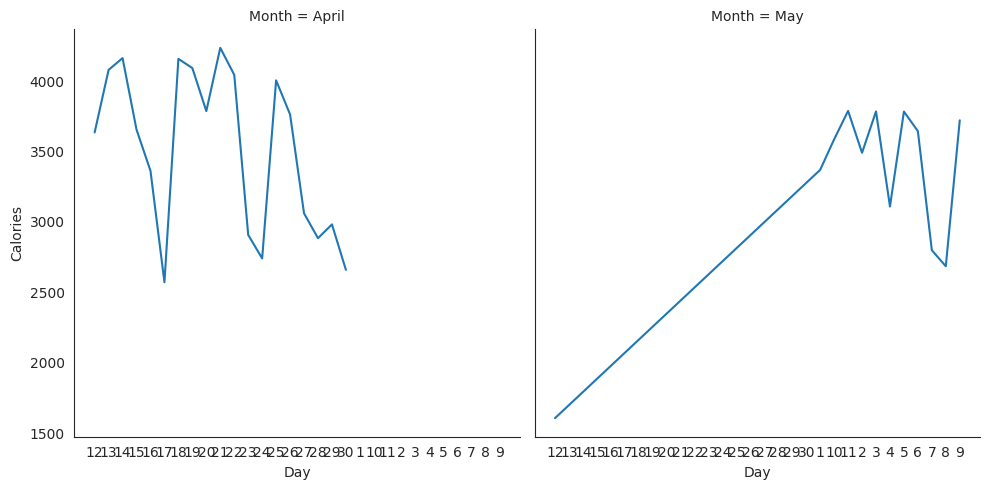

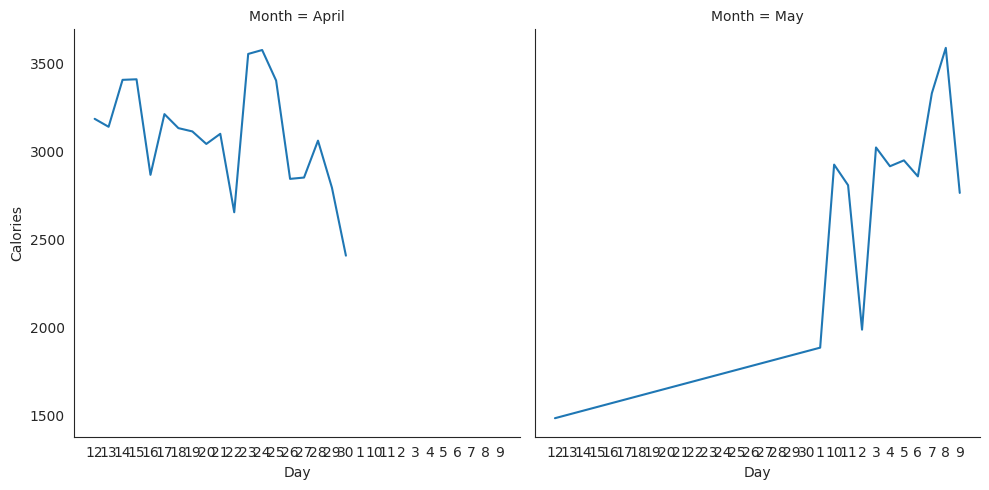

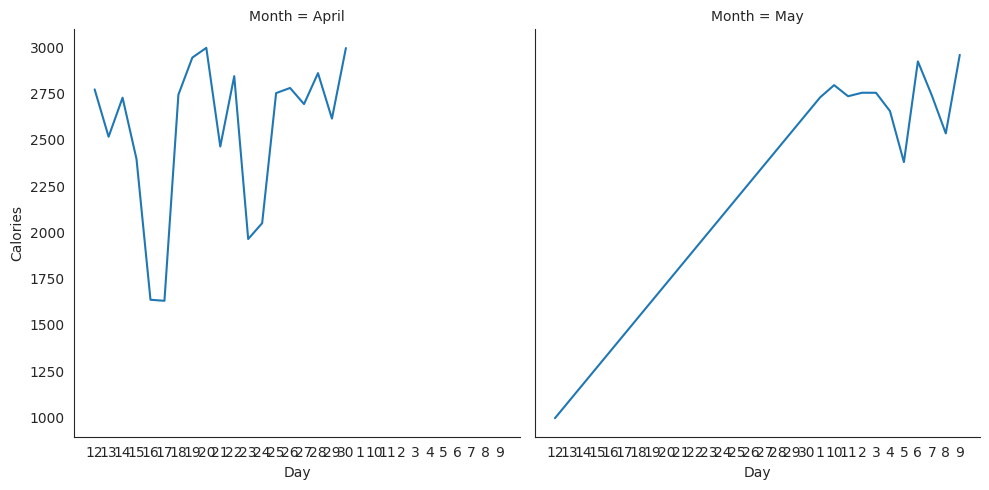

In [116]:
sns.relplot(avg_calories_df[avg_calories_df['Id']==4445114986], x="Day", y="Calories", col="Month",kind='line');
sns.relplot(avg_calories_df[avg_calories_df['Id']==4020332650], x="Day", y="Calories", col="Month",kind='line');
sns.relplot(avg_calories_df[avg_calories_df['Id']==8378563200], x="Day", y="Calories", col="Month",kind='line');
sns.relplot(avg_calories_df[avg_calories_df['Id']==8053475328], x="Day", y="Calories", col="Month",kind='line');
sns.relplot(avg_calories_df[avg_calories_df['Id']==7086361926], x="Day", y="Calories", col="Month",kind='line');

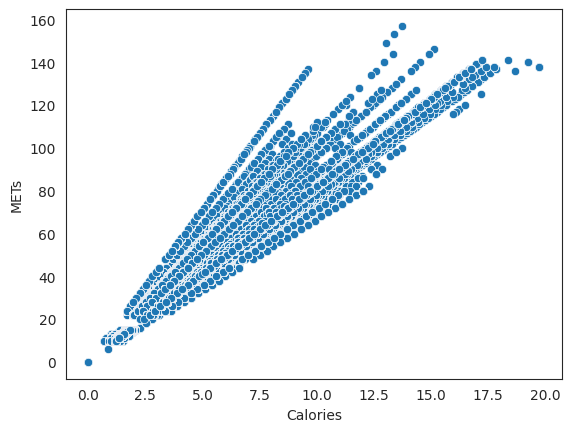

In [117]:
sns.scatterplot(data=minute_df, x="Calories", y="METs");

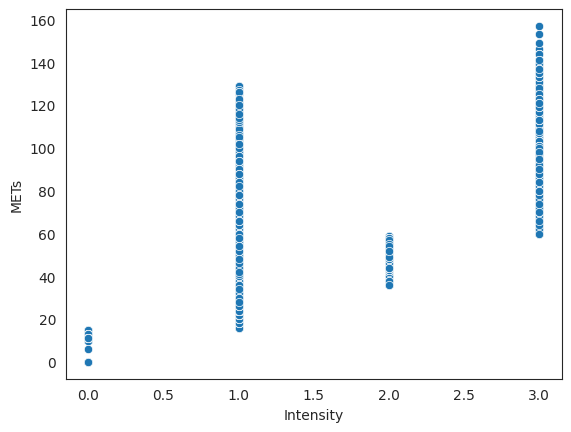

In [118]:
sns.scatterplot(data=minute_df, x="Intensity", y="METs");

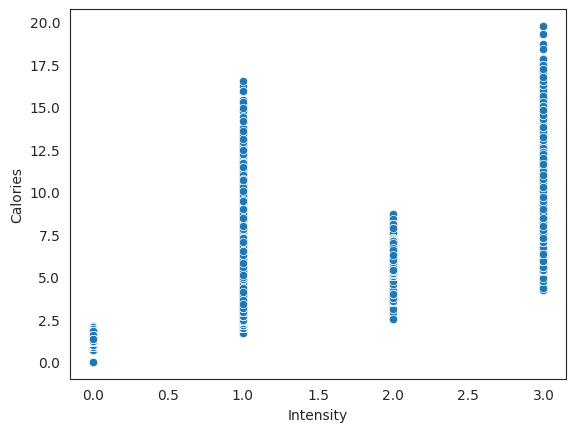

In [119]:
sns.scatterplot(data=minute_df, x="Intensity", y="Calories");

What are METs? A MET is a ratio of your working metabolic rate relative to your resting metabolic rate. Metabolic rate is the rate of energy expended per unit of time. It’s one way to describe the intensity of an exercise or activity.

Exercise capacity is based on metabolic equivalents (MET) achieved, (one MET is defined as 3.5 mL O2 uptake/kg per min, which is the resting oxygen uptake in a sitting position). Less than 5 METS is poor, 5–8 METS is fair, 9–11 METS is good, and 12 METS or more is excellent.

It makes sense that METs and Calories are closely correlated and share a linear correlation.

In [120]:
df16 = pd.read_csv('/content/drive/MyDrive/fitbase data/minuteStepsWide_merged.csv')
df16.head()

,Id,ActivityHour,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,Steps06,Steps07,...,Steps50,Steps51,Steps52,Steps53,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59
0,1503960366,4/13/2016 12:00:00 AM,4,16,0,0,0,9,0,17,...,0,9,8,0,20,1,0,0,0,0
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
df17 = pd.read_csv('/content/drive/MyDrive/fitbase data/sleepDay_merged.csv')
df17.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [122]:
df17['ActivityDate'] = pd.to_datetime(df17["SleepDay"])

In [123]:
df17.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate
0,1503960366,4/12/2016 12:00:00 AM,1,327,346,2016-04-12
1,1503960366,4/13/2016 12:00:00 AM,2,384,407,2016-04-13
2,1503960366,4/15/2016 12:00:00 AM,1,412,442,2016-04-15
3,1503960366,4/16/2016 12:00:00 AM,2,340,367,2016-04-16
4,1503960366,4/17/2016 12:00:00 AM,1,700,712,2016-04-17


In [124]:
df17['Month'] = df17['ActivityDate'].dt.month_name()
df17['Day'] = df17['ActivityDate'].dt.day

In [125]:
df17['TotalTimeInBed (hr)'] = round(df17['TotalTimeInBed'] / 60.0,2)

In [126]:
df17['TotalMinutesAsleep (hr)'] = round(df17['TotalMinutesAsleep'] / 60.0,2)
df17.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,Month,Day,TotalTimeInBed (hr),TotalMinutesAsleep (hr)
0,1503960366,4/12/2016 12:00:00 AM,1,327,346,2016-04-12,April,12,5.77,5.45
1,1503960366,4/13/2016 12:00:00 AM,2,384,407,2016-04-13,April,13,6.78,6.40
2,1503960366,4/15/2016 12:00:00 AM,1,412,442,2016-04-15,April,15,7.37,6.87
3,1503960366,4/16/2016 12:00:00 AM,2,340,367,2016-04-16,April,16,6.12,5.67
4,1503960366,4/17/2016 12:00:00 AM,1,700,712,2016-04-17,April,17,11.87,11.67


### Sleep patterns for top 5 users of Fitbit with the most entries for sleep data

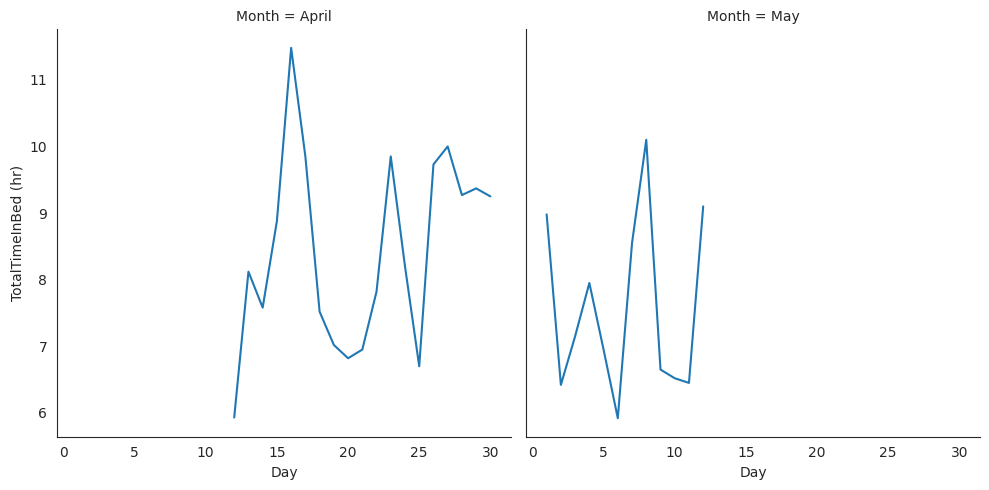

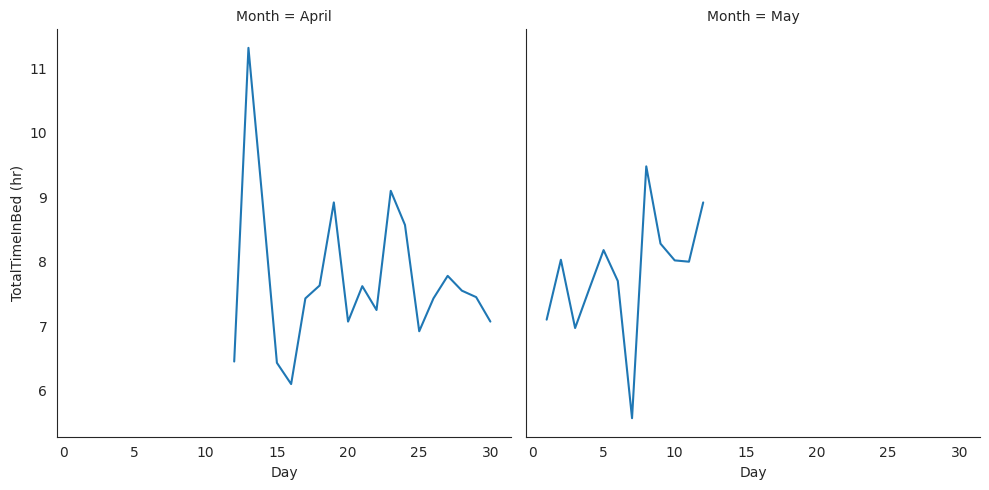

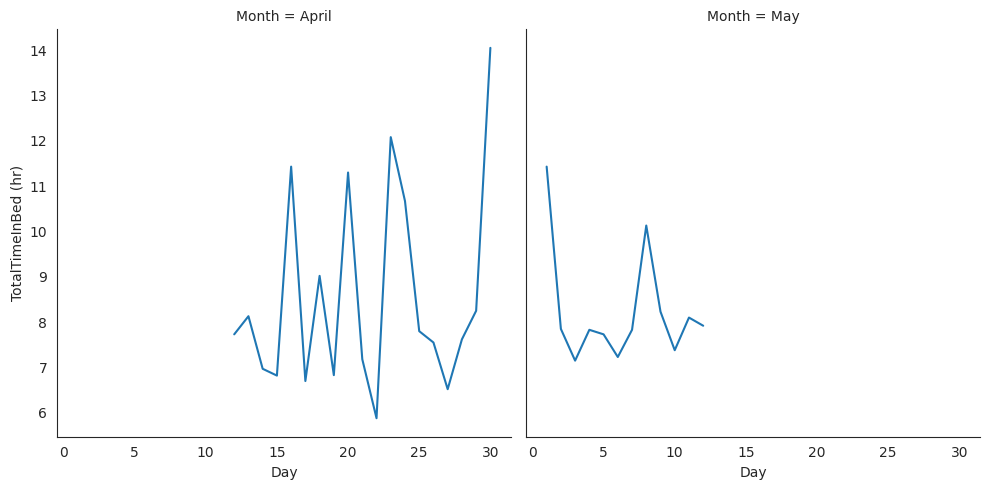

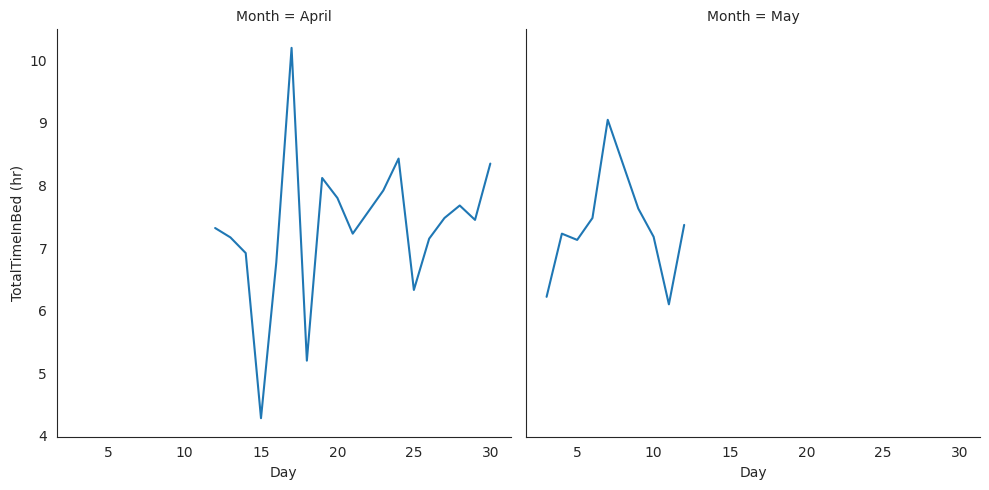

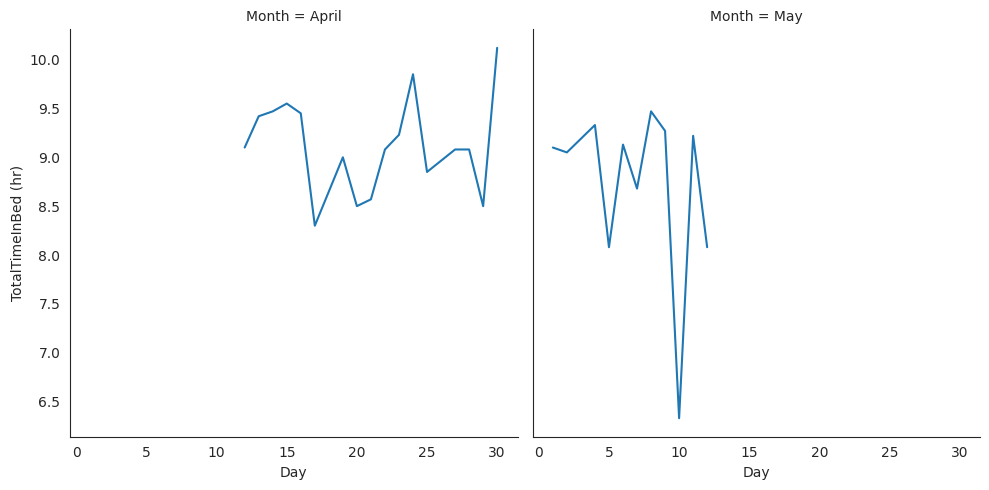

In [128]:
sns.relplot(df17[df17['Id']==8378563200], x="Day", y="TotalTimeInBed (hr)", col="Month",kind='line');
sns.relplot(df17[df17['Id']==6962181067], x="Day", y="TotalTimeInBed (hr)", col="Month",kind='line');
sns.relplot(df17[df17['Id']==5553957443], x="Day", y="TotalTimeInBed (hr)", col="Month",kind='line');
sns.relplot(df17[df17['Id']==4702921684], x="Day", y="TotalTimeInBed (hr)", col="Month",kind='line');
sns.relplot(df17[df17['Id']==2026352035], x="Day", y="TotalTimeInBed (hr)", col="Month",kind='line');

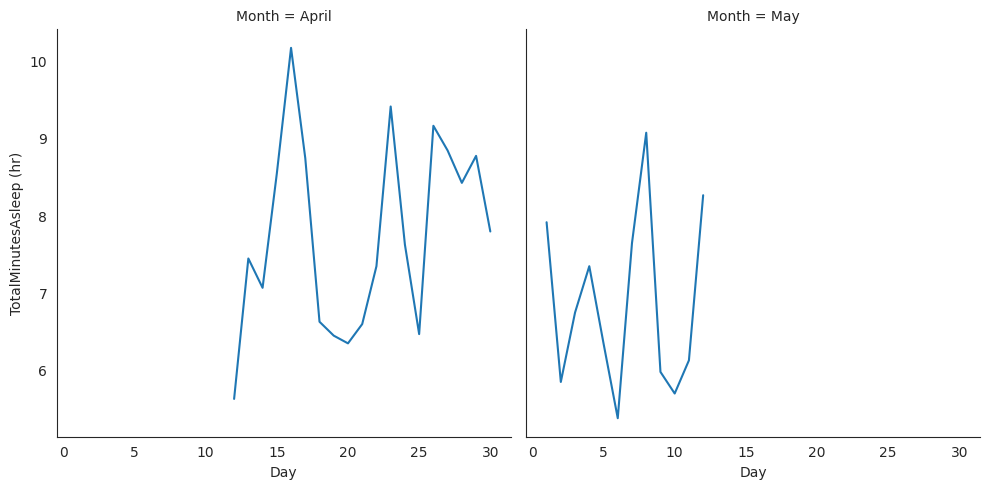

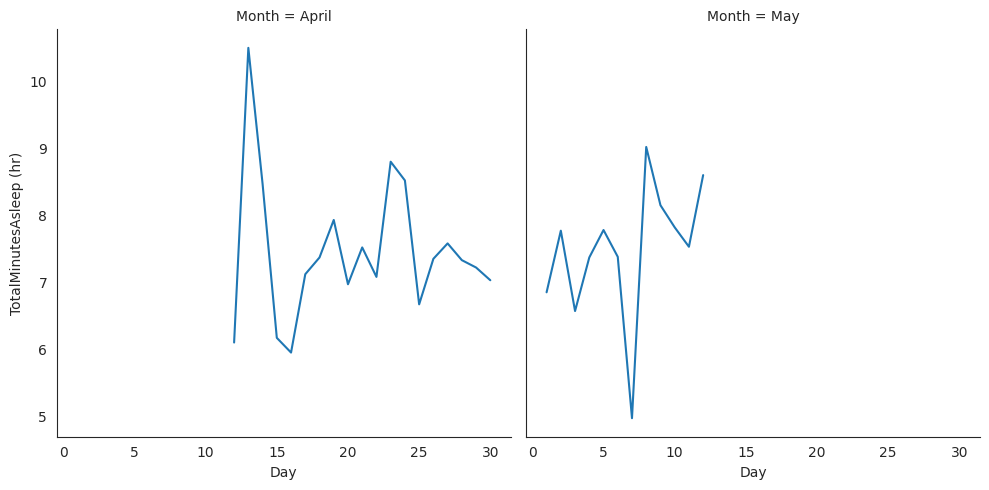

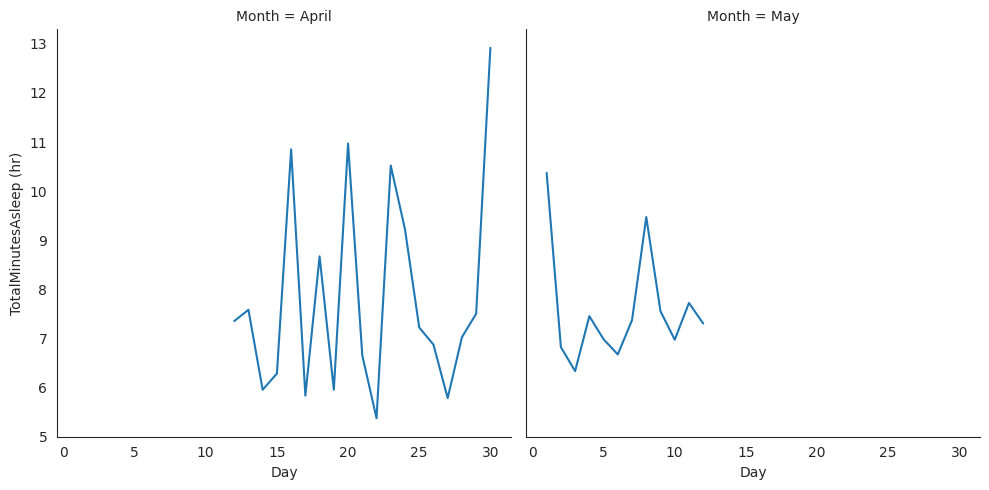

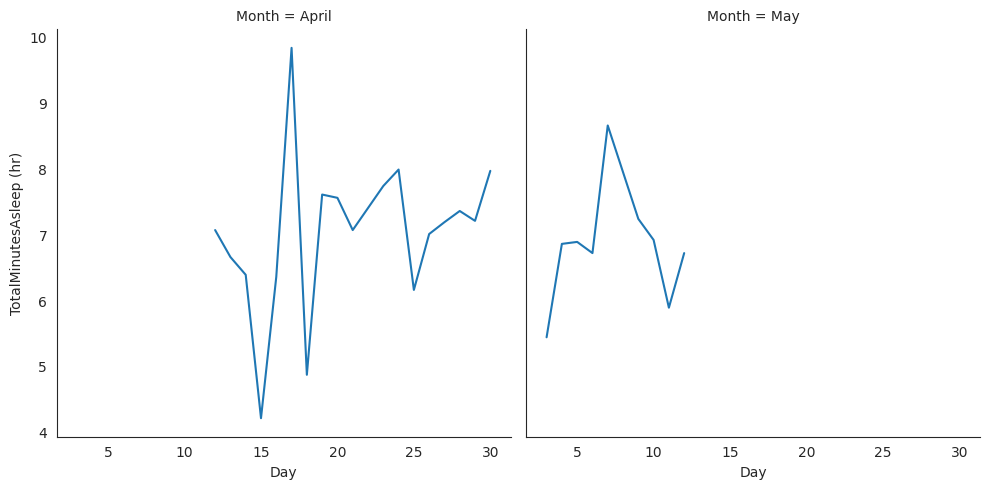

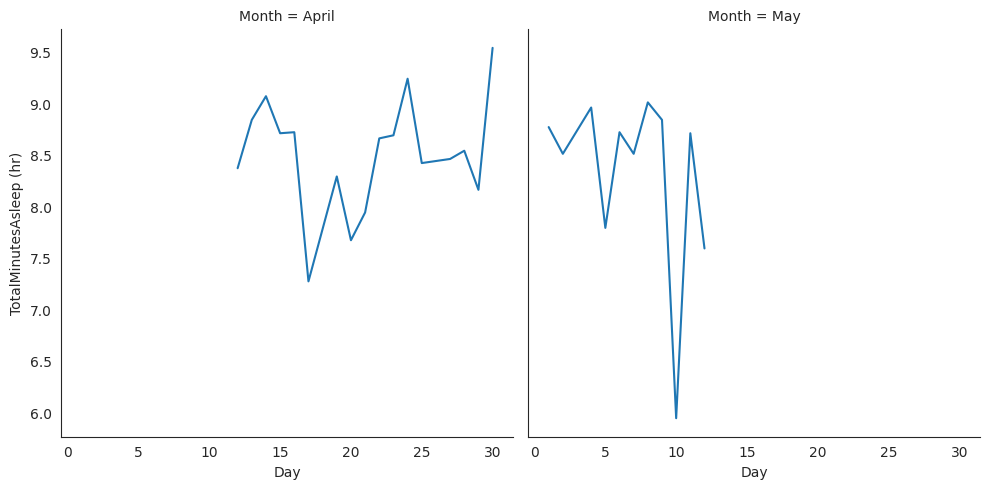

In [129]:
sns.relplot(df17[df17['Id']==8378563200], x="Day", y="TotalMinutesAsleep (hr)", col="Month",kind='line');
sns.relplot(df17[df17['Id']==6962181067], x="Day", y="TotalMinutesAsleep (hr)", col="Month",kind='line');
sns.relplot(df17[df17['Id']==5553957443], x="Day", y="TotalMinutesAsleep (hr)", col="Month",kind='line');
sns.relplot(df17[df17['Id']==4702921684], x="Day", y="TotalMinutesAsleep (hr)", col="Month",kind='line');
sns.relplot(df17[df17['Id']==2026352035], x="Day", y="TotalMinutesAsleep (hr)", col="Month",kind='line');

It appears that for most users, sleeping time varies from day to day. Least being 6 hours upwards 12-14 hours.

In [130]:
df17.columns

Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'ActivityDate', 'Month', 'Day', 'TotalTimeInBed (hr)',
       'TotalMinutesAsleep (hr)'],
      dtype='object')

In [131]:
df1.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [132]:
df17.shape, df1.shape

((413, 10), (940, 15))

In [133]:
df17['Id'].nunique()

24

Only 24 unique users with sleep data

In [186]:
df17['Id'].value_counts()

8378563200    32
6962181067    31
5553957443    31
4702921684    28
2026352035    28
3977333714    28
4445114986    28
5577150313    26
4319703577    26
1503960366    25
7086361926    24
4388161847    24
6117666160    18
8792009665    15
2347167796    15
4020332650     8
1927972279     5
4558609924     5
1644430081     4
6775888955     3
8053475328     3
1844505072     3
7007744171     2
2320127002     1
Name: Id, dtype: int64

In [134]:
df18 = pd.read_csv('/content/drive/MyDrive/fitbase data/weightLogInfo_merged.csv')
df18.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [135]:
df18["ActivityDate"] = pd.to_datetime(df18["Date"]).dt.normalize()

In [136]:
df18.groupby(['Id'])[['Date']].count()

,Date
Id,
1503960366,2
1927972279,1
2873212765,2
4319703577,2
4558609924,5
5577150313,1
6962181067,30
8877689391,24


Seems like there are only 2 users actively logging their weights - the others do not like to log weight

In [137]:
df18[df18['Id']==6962181067]

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,ActivityDate
13,6962181067,4/12/2016 11:59:59 PM,62.500000,137.788914,NaN,24.389999,True,1460505599000,2016-04-12
14,6962181067,4/13/2016 11:59:59 PM,62.099998,136.907061,NaN,24.240000,True,1460591999000,2016-04-13
15,6962181067,4/14/2016 11:59:59 PM,61.700001,136.025217,NaN,24.100000,True,1460678399000,2016-04-14
16,6962181067,4/15/2016 11:59:59 PM,61.500000,135.584291,NaN,24.000000,True,1460764799000,2016-04-15
17,6962181067,4/16/2016 11:59:59 PM,62.000000,136.686603,NaN,24.209999,True,1460851199000,2016-04-16
18,6962181067,4/17/2016 11:59:59 PM,61.400002,135.363832,NaN,23.959999,True,1460937599000,2016-04-17
19,6962181067,4/18/2016 11:59:59 PM,61.200001,134.922906,NaN,23.889999,True,1461023999000,2016-04-18
20,6962181067,4/19/2016 11:59:59 PM,61.400002,135.363832,NaN,23.959999,True,1461110399000,2016-04-19
21,6962181067,4/20/2016 11:59:59 PM,61.700001,136.025217,NaN,24.100000,True,1461196799000,2016-04-20
22,6962181067,4/21/2016 11:59:59 PM,61.400002,135.363832,NaN,23.959999,True,1461283199000,2016-04-21


In [138]:
df18[df18['Id']==8877689391]

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,ActivityDate
43,8877689391,4/12/2016 6:47:11 AM,85.800003,189.156628,NaN,25.680000,False,1460443631000,2016-04-12
44,8877689391,4/13/2016 6:55:00 AM,84.900002,187.172464,NaN,25.410000,False,1460530500000,2016-04-13
45,8877689391,4/14/2016 6:48:43 AM,84.500000,186.290612,NaN,25.309999,False,1460616523000,2016-04-14
46,8877689391,4/16/2016 1:39:25 PM,85.500000,188.495234,NaN,25.590000,False,1460813965000,2016-04-16
47,8877689391,4/18/2016 6:51:14 AM,85.800003,189.156628,NaN,25.680000,False,1460962274000,2016-04-18
48,8877689391,4/19/2016 6:39:31 AM,85.300003,188.054316,NaN,25.530001,False,1461047971000,2016-04-19
49,8877689391,4/20/2016 6:44:54 AM,84.900002,187.172464,NaN,25.410000,False,1461134694000,2016-04-20
50,8877689391,4/21/2016 6:50:27 AM,84.500000,186.290612,NaN,25.290001,False,1461221427000,2016-04-21
51,8877689391,4/23/2016 7:22:28 AM,85.500000,188.495234,NaN,25.590000,False,1461396148000,2016-04-23
52,8877689391,4/24/2016 7:38:05 AM,85.500000,188.495234,NaN,25.590000,False,1461483485000,2016-04-24


In [139]:
df18['Date'].value_counts()

5/2/2016 11:59:59 PM     3
5/4/2016 11:59:59 PM     2
5/3/2016 11:59:59 PM     2
5/1/2016 11:59:59 PM     2
4/25/2016 11:59:59 PM    2
4/18/2016 11:59:59 PM    2
5/9/2016 11:59:59 PM     2
4/17/2016 11:59:59 PM    2
5/12/2016 11:59:59 PM    2
4/21/2016 11:59:59 PM    2
4/27/2016 6:51:05 AM     1
4/18/2016 6:51:14 AM     1
4/16/2016 1:39:25 PM     1
4/19/2016 6:39:31 AM     1
4/20/2016 6:44:54 AM     1
4/21/2016 6:50:27 AM     1
4/23/2016 7:22:28 AM     1
4/24/2016 7:38:05 AM     1
4/25/2016 6:40:16 AM     1
4/26/2016 6:50:27 AM     1
5/1/2016 8:47:49 AM      1
4/28/2016 6:50:03 AM     1
4/29/2016 6:49:55 AM     1
4/30/2016 7:49:03 AM     1
4/13/2016 6:55:00 AM     1
5/3/2016 6:49:41 AM      1
5/4/2016 6:48:22 AM      1
5/6/2016 6:43:35 AM      1
5/8/2016 7:35:53 AM      1
5/9/2016 6:39:44 AM      1
5/11/2016 6:51:47 AM     1
4/14/2016 6:48:43 AM     1
5/7/2016 11:59:59 PM     1
4/12/2016 6:47:11 AM     1
4/22/2016 11:59:59 PM    1
4/13/2016 1:08:52 AM     1
4/17/2016 9:17:55 AM     1
4

In [140]:
compareIds(df18, df1)

Ids differ


In [141]:
df18.nunique()

Id                 8
Date              56
WeightKg          34
WeightPounds      34
Fat                2
BMI               36
IsManualReport     2
LogId             56
ActivityDate      31
dtype: int64

For only 8 unique users do we have their weight data, fat percentage, and BMI. Of these 8, 6 if them barely used the device to track their weight and BMI, entering data usually 1 or 2 days out of the 30 days. Only 2 individuals tracked their weight and BMI 24 and 30 times respectively.

Users do not track this data much, possibly because it is hard to enter. The other 25 users we do not have data for. Recommend that we do not make BellaBeat devices require this data.

In [142]:
df18.shape

(67, 9)

**Because of discrepancy in size to df18 and df1, we will not merge df18.**

### Merge df17 and df1

In [143]:
df1_df17_inner = df1.merge(df17, how = 'inner', on=['Id', 'ActivityDate'])

In [144]:
df1_df17_inner.shape

(413, 23)

In [145]:
df17.shape

(413, 10)

In [146]:
df1_df17_inner.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'SleepDay',
       'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed', 'Month',
       'Day', 'TotalTimeInBed (hr)', 'TotalMinutesAsleep (hr)'],
      dtype='object')

In [147]:
# Changing the activity date to a date variable

df1_df17_inner['ActivityDate'] = pd.to_datetime(df1_df17_inner['ActivityDate'])

In [148]:
#Extracting time features
df1_df17_inner['Month_num'] = df1_df17_inner['ActivityDate'].dt.month
df1_df17_inner['Month_name'] = df1_df17_inner['ActivityDate'].dt.month_name()
df1_df17_inner['Day_of month_num'] = df1_df17_inner['ActivityDate'].dt.day
df1_df17_inner['Day_name'] = df1_df17_inner['ActivityDate'].dt.day_name()
df1_df17_inner['Day_num'] = df1_df17_inner['ActivityDate'].dt.dayofweek


In [149]:
df1_df17_inner.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,TotalTimeInBed,Month,Day,TotalTimeInBed (hr),TotalMinutesAsleep (hr),Month_num,Month_name,Day_of month_num,Day_name,Day_num
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,346,April,12,5.77,5.45,4,April,12,Tuesday,1
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,407,April,13,6.78,6.40,4,April,13,Wednesday,2
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,442,April,15,7.37,6.87,4,April,15,Friday,4
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,367,April,16,6.12,5.67,4,April,16,Saturday,5
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,...,712,April,17,11.87,11.67,4,April,17,Sunday,6


df1 had 940 rows, so by inspecting the value counts and their relation to 940, we can tell how much each 'distance' was tracked

In [150]:
df1.shape

(940, 15)

In [151]:
df1['SedentaryActiveDistance'].value_counts()

0.00    858
0.01     50
0.02     21
0.03      4
0.05      3
0.07      1
0.04      1
0.11      1
0.10      1
Name: SedentaryActiveDistance, dtype: int64

In [152]:
df1['LoggedActivitiesDistance'].value_counts()

0.000000    908
2.092147      9
2.253081      7
4.081692      1
4.861792      1
4.878232      1
4.912368      1
2.832326      1
4.911146      1
4.885605      1
4.924841      1
2.785175      1
1.959596      1
4.930550      1
3.285415      1
4.851307      1
4.869783      1
3.167822      1
4.942142      1
Name: LoggedActivitiesDistance, dtype: int64

In [153]:
df1['ModeratelyActiveDistance'].value_counts()

0.00    386
0.20      9
0.28      9
0.40      9
0.25      8
       ... 
4.13      1
4.11      1
4.58      1
6.48      1
0.13      1
Name: ModeratelyActiveDistance, Length: 211, dtype: int64

In [154]:
df1['LightActiveDistance'].value_counts()

0.00    85
4.18     6
3.17     6
4.88     6
3.23     6
        ..
3.80     1
6.44     1
0.41     1
4.04     1
5.89     1
Name: LightActiveDistance, Length: 491, dtype: int64

In [155]:
df1['VeryActiveDistance'].value_counts()

0.00     413
0.07       9
0.06       6
0.14       5
0.33       5
        ... 
0.74       1
0.26       1
0.96       1
0.76       1
13.22      1
Name: VeryActiveDistance, Length: 333, dtype: int64

In [156]:
df1['TotalSteps'].value_counts()

0        77
244       2
6708      2
9167      2
6175      2
         ..
13459     1
10415     1
11663     1
12414     1
8064      1
Name: TotalSteps, Length: 842, dtype: int64

VeryActiveDistance, ModeratelyActiveDistance, LoggedActivitiesDistance, and especially SedentaryActiveDistance were not tracked much by FitBit devices. For BellaBeat, we recommend that since users use TotalSteps and LightActiveDistance the most, perhaps they like to wear devices for lighter activities like walking.

In [157]:
df1_df17_inner['Day_of month_num']

0      12
1      13
2      15
3      16
4      17
       ..
408    30
409     1
410     2
411     3
412     4
Name: Day_of month_num, Length: 413, dtype: int64

In [158]:
df1_df17_inner.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'SleepDay',
       'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed', 'Month',
       'Day', 'TotalTimeInBed (hr)', 'TotalMinutesAsleep (hr)', 'Month_num',
       'Month_name', 'Day_of month_num', 'Day_name', 'Day_num'],
      dtype='object')

In [159]:
df1_df17_inner[['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
                 'Calories','TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed',
                 'Month_num', 'Month_name', 'Day_num', 'Day_name']]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Month_num,Month_name,Day_num,Day_name
0,1503960366,2016-04-12,13162,8.50,8.50,1985,1,327,346,4,April,1,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,1797,2,384,407,4,April,2,Wednesday
2,1503960366,2016-04-15,9762,6.28,6.28,1745,1,412,442,4,April,4,Friday
3,1503960366,2016-04-16,12669,8.16,8.16,1863,2,340,367,4,April,5,Saturday
4,1503960366,2016-04-17,9705,6.48,6.48,1728,1,700,712,4,April,6,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,8792009665,2016-04-30,7174,4.59,4.59,2896,1,343,360,4,April,5,Saturday
409,8792009665,2016-05-01,1619,1.04,1.04,1962,1,503,527,5,May,6,Sunday
410,8792009665,2016-05-02,1831,1.17,1.17,2015,1,415,423,5,May,0,Monday
411,8792009665,2016-05-03,2421,1.55,1.55,2297,1,516,545,5,May,1,Tuesday


In [160]:
df1_df17_inner['ActivityDate'].min(), df1_df17_inner['ActivityDate'].max()

(Timestamp('2016-04-12 00:00:00'), Timestamp('2016-05-12 00:00:00'))

In [161]:
df1_df17_inner['Id'].nunique()

24

In [162]:
df1['Id'].nunique()

33

**24 unique users tracked their activities,calories, and sleep. 33 total users which used the device to track their activities and calories. Fewer users were interested in wearing their devices to bed.**

In [163]:
usage_df = df1_df17_inner.groupby(['Id'])['Calories'].count()\
.reset_index()\
.rename(columns={'Calories': 'Count'})

usage_df.head()

,Id,Count
0,1503960366,25
1,1644430081,4
2,1844505072,3
3,1927972279,5
4,2026352035,28


In [164]:
avg_cal_df = df1_df17_inner.groupby(['Id'])['Calories'].mean()\
.reset_index()\
.rename(columns={'Calories': 'Avg Calories'})

avg_cal_df.head()

,Id,Avg Calories
0,1503960366,1872.280000
1,1644430081,2977.750000
2,1844505072,1676.333333
3,1927972279,2316.200000
4,2026352035,1540.785714


In [165]:
cal_usage_df = avg_cal_df.merge(usage_df, on=['Id'], how='outer')
cal_usage_df.head()

,Id,Avg Calories,Count
0,1503960366,1872.280000,25
1,1644430081,2977.750000,4
2,1844505072,1676.333333,3
3,1927972279,2316.200000,5
4,2026352035,1540.785714,28


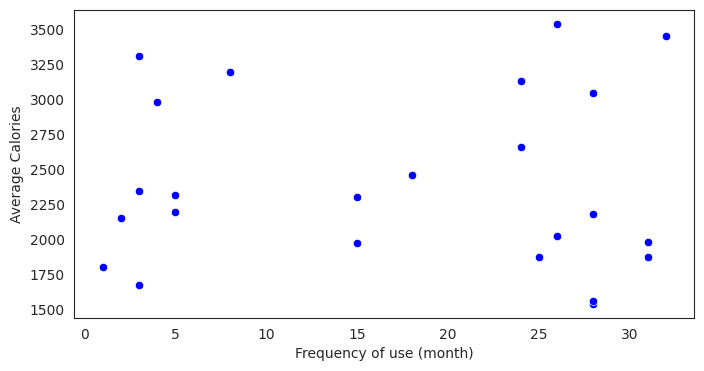

In [166]:
plt.figure(figsize=(8,4))
ax = sns.scatterplot(cal_usage_df, x="Count", y="Avg Calories", color="blue");
ax.set(xlabel="Frequency of use (month)", ylabel = "Average Calories");


Seems like there is no relationship between frequency of use and average calories burned - doesnt seem like greater frequency of use will lead to more calories burned

In [167]:
usage_df =df1_df17_inner.groupby(['Month_name', 'Day_of month_num'])[['Calories']].count()\
    .reset_index()\
    .rename(columns={'Calories':'Count'})

usage_df.head()

,Month_name,Day_of month_num,Count
0,April,12,13
1,April,13,14
2,April,14,13
3,April,15,17
4,April,16,14


In [168]:
usage_df[usage_df['Month_name'] == 'April']['Count'].sum(), usage_df[usage_df['Month_name'] == 'May']['Count'].sum()

(265, 148)

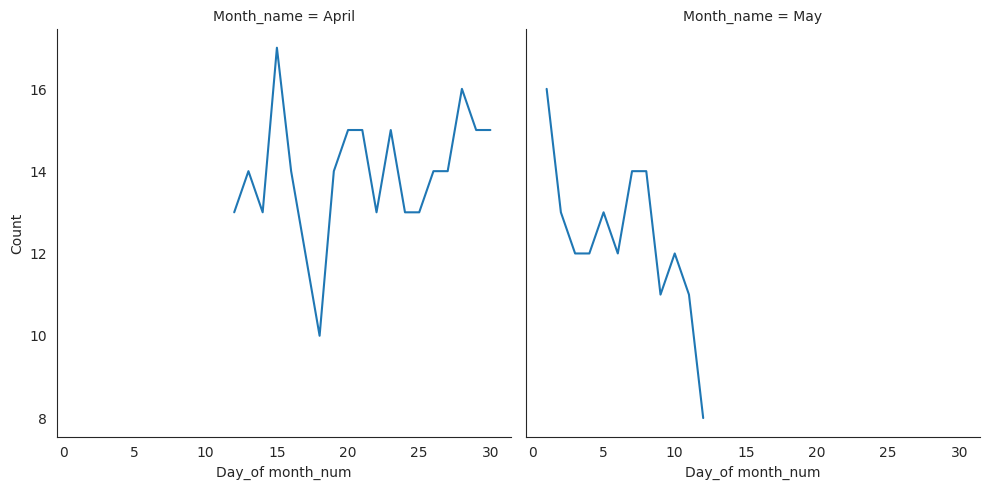

In [169]:
sns.relplot(usage_df, x="Day_of month_num", y="Count", col="Month_name",kind='line');

From what we see here, people do not like to use these to track their sleep, and upon using it for a month, usage really dropped on Month 2.

Users in all, used their devices to track 265 sessions in Month 1, April, but only 148 sessions in Month 2, May.


Users also prefer to wear their devices for very active distances, and not for sedentary distances. A recommendation if we want users to use their BellaBeat devices, we should make the device more comfortable or unnoticable for users to wear.

In [170]:
count_df =df1_df17_inner.groupby(['Day_name','Day_num','Id'])[['Calories']].count()\
    .reset_index()\
    .groupby(['Day_name','Day_num'])[['Calories']].sum()\
    .reset_index()\
    .rename(columns={'Calories':'Count'})\
    .sort_values(by='Day_num')\


count_df

,Day_name,Day_num,Count
1,Monday,0,47
5,Tuesday,1,65
6,Wednesday,2,66
4,Thursday,3,65
0,Friday,4,57
2,Saturday,5,58
3,Sunday,6,55


Count is the number of times the fitbase was used from the time period 4/12 - 5/12 by all 24 users. e.g. over 4 tuesdays of the month, 24 users used their fitbits to track their data totally (sleep and activity) 65 times.

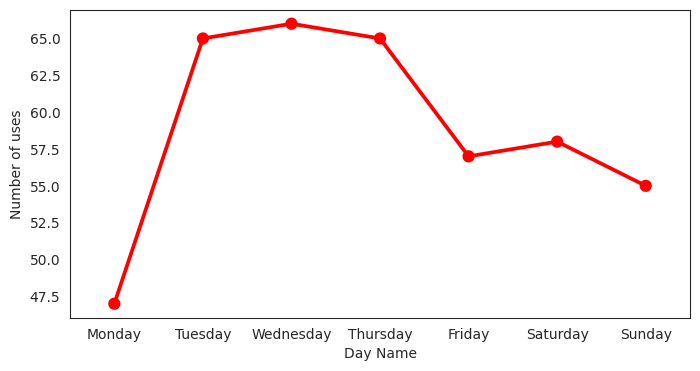

In [171]:
plt.figure(figsize=(8,4))
ax = sns.pointplot(count_df, x="Day_name", y="Count", color="red");
ax.set(xlabel="Day Name", ylabel = "Number of uses");


The usage is the highest Tuesday, Wednesday and Thursday (middle of the week). Monday has the lowest uses by far.

In [172]:
df1_df17_inner.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'SleepDay',
       'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed', 'Month',
       'Day', 'TotalTimeInBed (hr)', 'TotalMinutesAsleep (hr)', 'Month_num',
       'Month_name', 'Day_of month_num', 'Day_name', 'Day_num'],
      dtype='object')

In [173]:
df_corr = df1_df17_inner[['TotalSteps', 'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'Calories', 'TotalTimeInBed']]

In [174]:
cor = df_corr.corr()
cor

,TotalSteps,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,Calories,TotalTimeInBed
TotalSteps,1.000000,0.119811,0.677084,0.581008,0.586532,0.046653,0.411996,-0.164060
LoggedActivitiesDistance,0.119811,1.000000,0.201486,0.026928,0.061041,0.374190,0.323124,-0.061749
VeryActiveDistance,0.677084,0.201486,1.000000,0.225194,-0.038710,0.052483,0.439557,-0.112891
ModeratelyActiveDistance,0.581008,0.026928,0.225194,1.000000,0.156589,0.064924,0.079078,-0.094983
LightActiveDistance,0.586532,0.061041,-0.038710,0.156589,1.000000,0.001859,0.342301,-0.091497
SedentaryActiveDistance,0.046653,0.374190,0.052483,0.064924,0.001859,1.000000,0.027032,-0.054537
Calories,0.411996,0.323124,0.439557,0.079078,0.342301,0.027032,1.000000,-0.132507
TotalTimeInBed,-0.164060,-0.061749,-0.112891,-0.094983,-0.091497,-0.054537,-0.132507,1.000000


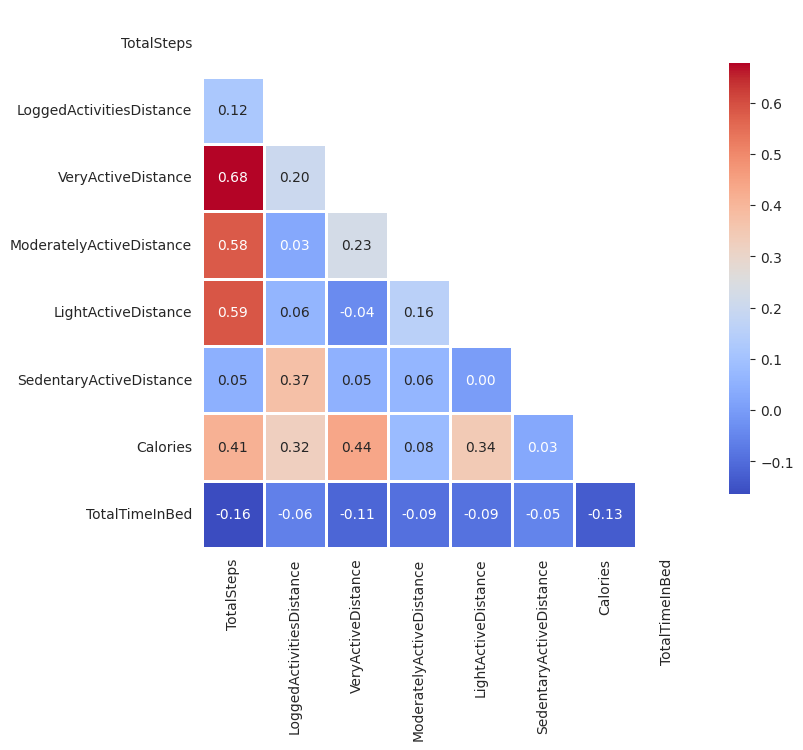

In [175]:
# creating a mask to keep only the half of the correlation table

mask = np.triu(np.ones_like(cor,dtype=bool))

plt.figure(figsize=(8,7))
sns.heatmap(cor,annot = cor,mask=mask,
cmap = 'coolwarm',
linewidths=1,fmt=".2f",
cbar_kws={"shrink": .8})
plt.show()

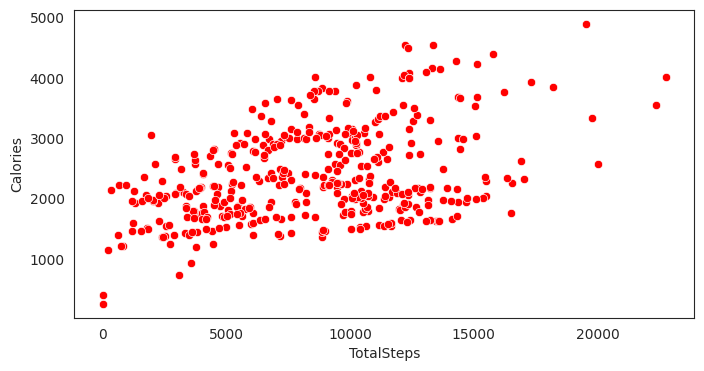

In [176]:
plt.figure(figsize=(8,4))
ax = sns.scatterplot(df_corr, x="TotalSteps", y="Calories", color="red");
ax.set(xlabel="TotalSteps", ylabel = "Calories");


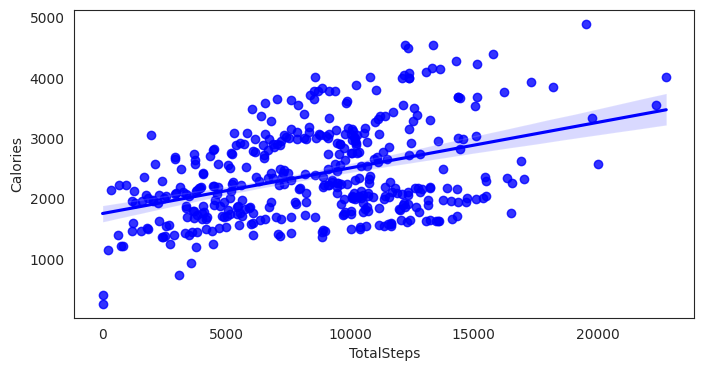

In [177]:
plt.figure(figsize=(8,4))
ax = sns.regplot(df_corr, x="TotalSteps", y="Calories", color="blue");
ax.set(xlabel="TotalSteps", ylabel = "Calories");


**Compare Total Steps with Total Calories burned. Expect more steps = total calories consumed, slight positive correlation.**

In [178]:
calories_df = round(df1.groupby(['Id'])['Calories'].mean(),2)\
  .reset_index()

calories_df.head()

,Id,Calories
0,1503960366,1816.42
1,1624580081,1483.35
2,1644430081,2811.30
3,1844505072,1573.48
4,1927972279,2172.81


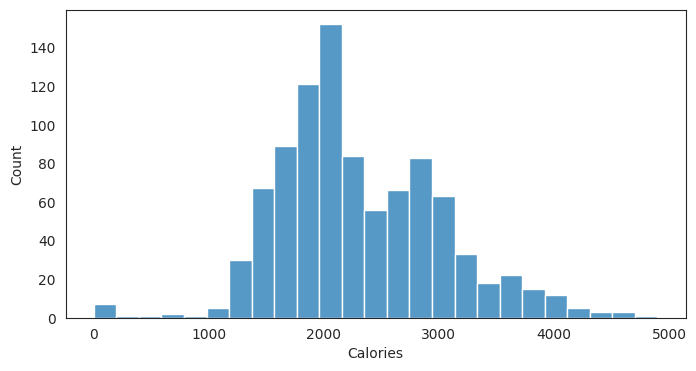

In [179]:
plt.figure(figsize=(8,4))
sns.histplot(data=df1, x="Calories");

The distribution of the calories is normal. (If it was skewed, there would be an abnormality or outlier)

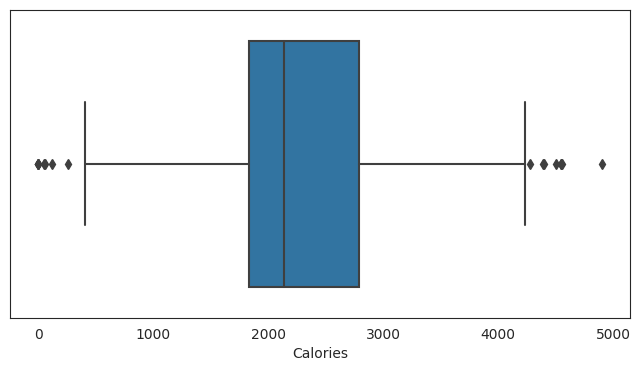

In [180]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df1, x="Calories");

Because there are outliers, using the mean calories is not a good metric, we prefer to use the median as a representative (2134 Calories per day consumed)

In [181]:
df1['Calories'].mean(), df1['Calories'].median()

(2303.609574468085, 2134.0)

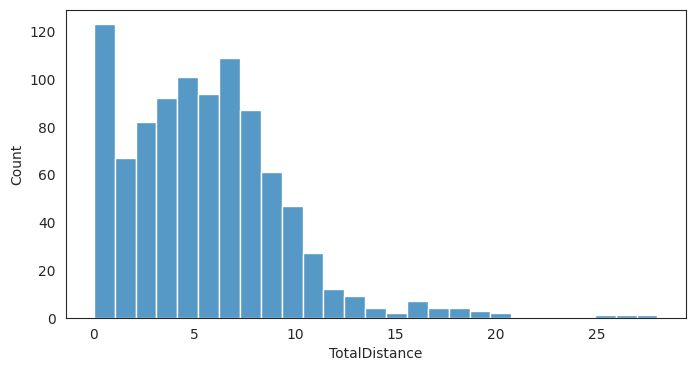

In [182]:
plt.figure(figsize=(8,4))
sns.histplot(data=df1, x="TotalDistance");

In [183]:
round(df1['TotalDistance'].mean(),2), round(df1['TotalDistance'].median(),2), round(df1['TotalDistance'].max(),2), df1['TotalDistance'].min()

(5.49, 5.24, 28.03, 0.0)

Most people track between 0 and 10 (miles? - does not specify miles or km), however some do not track and have 0 distance some days and others up to 28 units of distance other days. Distribution is skewed right

In [184]:
(df1['TotalDistance'] == 0).sum(), df1.shape

(78, (940, 15))

In [185]:
str(round(78/940 * 100,2)) + "%"

'8.3%'

78 of the distances were 0, so it means 78 of 940 entries (8.3%) occured from users not using their devices that day.

### Conclusions and Takeaways

Users mostly use their Fitbit devices to track totalsteps and lightly active exercises.

They do not like to wear their devices for sedentary activities (sitting, standing, watching TV), as most of the blank data or unlogged data occurs in those categories.

Nor do participants like to wear their devices for sleeping as we only have 24 participants sleep data out of 33.

They do not like to wear their devices for heart rate tracking as we only have 14 participants heart rate data out of 33.

Even less, only for 8 participants do we have weight and BMI data.

Around 8.3% of the days, users chose not to wear their devices to track steps or distances as the total distances for those days were 0.

Use of devices dropped from a total of 265 tracked sessions in Month 1 to only 148 tracked sessions in Month 2.

Users log their sessions mostly on Tuesday, Wednesday, and Thursday. There is not as much usage on Monday, Friday, Saturday, and Sunday. The least amount of usage is Monday.

**Recommendation:** Find some way to make the devices more comfortable to wear and incentivize the users to use their devices. We should find more data and advertise the users - perhaps more calories are burned with the device, to use the device for those reasons. More data is needed.

Add functionality to the devices so they wear them during sleep and intense exercise. We can provide interesting data such as how long they were in REM sleep and how much their metabolism increased / how many more calories burned during those exercises.

The biggest missing data that would incentivize users would be data to track their calories burned rather than keeping track of calories consumed during that day.